# Project Description

Our machine learning project aims to assist sector-diversified investors in building optimized portfolios by analyzing and predicting stock performance within selected sectors. We will begin by focusing on the infotech and finance sectors of the S&P 500, aggregating companies based on their volmume weights, enabling investors to construct personalized portfolios based on their chosen companies within these sectors. 

## Objective 

We aim to calculate the portfolio's Next Day Closing Return to provide investors with a high-level view of overall portfolio performance. By aggregating individual stock prices based on their volume weights, this approach enables investors to assess portfolio health, evaluate sector contributions (e.g., infotech, finance), and focus on broader trends, reducing the noise from daily stock-specific volatility.

The predicted portfolio close price can serve as signals by providing actionable insights into the portfolio's overall trajectory. It helps us in:

1. Trend Detection: A rising or falling predicted close price signals potential portfolio growth or decline, prompting investors to adjust their allocations.
2. Sector Analysis: Changes in the aggregated value can indicate shifts in sector performance, guiding rebalancing decisions.
3. Risk Monitoring: Sudden deviations or volatility in the continuous value signal potential risks or opportunities, helping investors act proactively.



In [34]:
# importing the necessary packages

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import LabelEncoder

# **Data Exploration and Cleaning**

For this project, we decided to focus and place emphasis on the the infotech and financial sector and build a portfolio of companies that are within this sector and exists in S&P500 stocks which are more commonly traded. We sourced the snp 500 dataset from Kaggle within the same time period of 1970 - 2018 for comparison

In [35]:
# Reading the S&P500 Stocks for us to break the stocks into diff sectors
snp_df = pd.read_csv("../Data/sp500.csv")

# filtering out company stocks according to their sectors 
info_tech = snp_df[snp_df['Sector'] == 'Information Technology']
finance = snp_df[snp_df['Sector'] == 'Financials']

# info tech stock tickers
info_tech_tickers = info_tech['Symbol'].tolist()
finance_tickers = finance['Symbol'].tolist()

print(f'Number of influential Info Tech Companies: {len(info_tech_tickers)}')
print(f'Number of influential Finance Companies: {len(finance_tickers)}')


Number of influential Info Tech Companies: 71
Number of influential Finance Companies: 66


We processed the stock data from the given stock dataset, filtering and categorizing it into two datasets: information technology (info-tech) and finance. It reads .txt files containing stock data, validates their content, associates them with predefined tickers for each sector, and concatenates the results into dataframes for further analysis.

In [36]:
# Stock folder paths
stock_folder_path = '../Data/Stocks'

def creating_stock_dataset(foldername, asset_type):
    info_tech_data = []
    finance_tech_data = []

    for dirname, _, filenames in os.walk(foldername):
        for filename in filenames:
            company_ticker = filename.rsplit('.', 2)[0].upper()
            
            # we are only filtering for company data that is in this case in info_tech or finance 
            if filename.endswith('.txt'):
                file_path = os.path.join(dirname, filename)


                try:
                    # Added for better memory usage
                    txt_df = pd.read_csv(file_path, delimiter=',', dtype={
                        'Open': 'float32',
                        'High': 'float32',
                        'Low': 'float32',
                        'Close': 'float32',
                        'Volume': 'float32'
                    })

                    # Ensuring that the company ticker exist in the info-tech field
                    if company_ticker in info_tech_tickers:
                        txt_df['symbol'] = company_ticker
                        info_tech_data.append(txt_df)

                    # Ensuring that the company ticker exist in the finance field
                    elif company_ticker in finance_tickers:
                        txt_df['symbol'] = company_ticker
                        finance_tech_data.append(txt_df)


                except pd.errors.EmptyDataError:
                    continue

    return info_tech_data, finance_tech_data



info_tech_data, finance_tech_data = creating_stock_dataset(stock_folder_path, 'Stocks')

# dataframes for infotech and finance tech
df_info_tech = pd.concat(info_tech_data, ignore_index=True)
df_finance= pd.concat(finance_tech_data, ignore_index=True)

Some quick data analysis on companies in the newly filtered financial and info tech sectors

In [37]:
# info_tech company
print("========== info_tech Data Types ==========")
print(df_info_tech.dtypes)
print("========== info_tech Dataframe Shape ==========")
print(df_info_tech.shape)
print("========== info_tech Dataframe table ==========")
print(df_info_tech.head()) 

========== info_tech Data Types ==========
Date        object
Open       float32
High       float32
Low        float32
Close      float32
Volume     float32
OpenInt      int64
symbol      object
dtype: object
========== info_tech Dataframe Shape ==========
(339388, 8)
========== info_tech Dataframe table ==========
         Date     Open     High      Low    Close      Volume  OpenInt symbol
0  1984-09-07  0.42388  0.42902  0.41874  0.42388  23220030.0        0   AAPL
1  1984-09-10  0.42388  0.42516  0.41366  0.42134  18022532.0        0   AAPL
2  1984-09-11  0.42516  0.43668  0.42516  0.42902  42498200.0        0   AAPL
3  1984-09-12  0.42902  0.43157  0.41618  0.41618  37125800.0        0   AAPL
4  1984-09-13  0.43927  0.44052  0.43927  0.43927  57822064.0        0   AAPL


In [38]:
print("========== info_tech Missing Values ==========")
print(df_info_tech.isnull().sum())
print("========== info_tech Duplicate Values ==========")
print(df_info_tech.duplicated().sum())

========== info_tech Missing Values ==========
Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
symbol     0
dtype: int64
========== info_tech Duplicate Values ==========
0


In [39]:
# finance company
print("========== Finance Data Types ==========")
print(df_finance.dtypes)
print("========== Finance Dataframe Shape ==========")
print(df_finance.shape)
print("========== Finance Dataframe table ==========")
print(df_finance.head())

========== Finance Data Types ==========
Date        object
Open       float32
High       float32
Low        float32
Close      float32
Volume     float32
OpenInt      int64
symbol      object
dtype: object
========== Finance Dataframe Shape ==========
(343579, 8)
========== Finance Dataframe table ==========
         Date     Open     High      Low    Close     Volume  OpenInt symbol
0  1984-07-19  0.38110  0.39787  0.38110  0.38938   514477.0        0    AFL
1  1984-07-20  0.38938  0.39787  0.38938  0.38938  1153677.0        0    AFL
2  1984-07-23  0.38938  0.38938  0.37251  0.37251   787306.0        0    AFL
3  1984-07-24  0.37251  0.38938  0.37251  0.37251   374165.0        0    AFL
4  1984-07-25  0.37251  0.37251  0.36401  0.36401   506684.0        0    AFL


In [40]:
print("========== Finance Missing Values ==========")
print(df_finance.isnull().sum())
print("========== Finance Duplicate Values ==========")
print(df_finance.duplicated().sum())

========== Finance Missing Values ==========
Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
symbol     0
dtype: int64
========== Finance Duplicate Values ==========
0


In [41]:
# Converting Date from Object to Datetime datatype
df_info_tech['Date'] = pd.to_datetime(df_info_tech['Date'])
df_finance['Date'] = pd.to_datetime(df_finance['Date'])

In [42]:
# Removed the redundant column OpenInt since it has no useful variation
# OpenInt are not important to ETFs and Stocks, only to derivatives like options and futures

print(df_info_tech['OpenInt'].unique())
df_info_tech = df_info_tech.drop(columns=['OpenInt'])

print(df_finance['OpenInt'].unique())
df_finance = df_finance.drop(columns=['OpenInt'])

[0]
[0]


We removed stocks with more than 10% zero-volume trading days to ensure data reliability and improve the accuracy of our analysis. High zero-volume days indicate poor liquidity, which can skew metrics and lead to unreliable insights. By focusing on consistently traded stocks, we enhance the dataset's quality, enabling more actionable and accurate portfolio and sector-level evaluations.


In [43]:

# Function to remove stocks from the dataset that have more than 10% of zero-volume days
def remove_zero_volume_stocks(df, threshold=10):
    
    stock_zero_volume_count = df[df['Volume'] == 0].groupby('symbol')['Volume'].count()
    stock_total_days_count = df.groupby('symbol')['Volume'].count()

    # Calculate the percentage of zero-volume days for each stock
    zero_volume_percentage = (stock_zero_volume_count / stock_total_days_count) * 100

    # Identify stocks to remove based on the threshold
    stocks_to_remove = zero_volume_percentage[zero_volume_percentage > threshold].index

    # Filter out stocks that exceed the zero-volume threshold
    df_cleaned = df[~df['symbol'].isin(stocks_to_remove)]

    
    print(f"Removed {len(stocks_to_remove)} stocks with more than {threshold}% zero-volume days.")
    print(f"Remaining stocks: {df_cleaned['symbol'].nunique()}")

    return df_cleaned


Looks like everything is clean! So that is good to go

In [44]:
# Cleaning out the datasets with more than 10% of their stocks being zero volume stocks for both tech and finance
df_info_tech = remove_zero_volume_stocks(df_info_tech, threshold=10)
df_finance = remove_zero_volume_stocks(df_finance, threshold=10)

Removed 0 stocks with more than 10% zero-volume days.
Remaining stocks: 70
Removed 0 stocks with more than 10% zero-volume days.
Remaining stocks: 63


In [45]:

def calculate_zero_open_percentage(df_cleaned, price):
  # Group by symbol and calculate the count of zero Open values for each symbol
  zero_count_by_symbol = df_cleaned[df_cleaned[price] == 0].groupby('symbol')[price].count()
  zero_count_df = zero_count_by_symbol.reset_index()
  zero_count_df.columns = ['symbol', 'zero_count']

  # Count of total values of these symbols that contain these
  count_breakdown_with_zero_counts = df_cleaned[df_cleaned['symbol'].isin(df_cleaned[df_cleaned[price] == 0]['symbol'])].groupby('symbol')[price].count()
  total_count_df = count_breakdown_with_zero_counts.reset_index()
  total_count_df.columns = ['symbol', 'total_count']

  # Merge the two DataFrames on 'symbol'
  merged_df = pd.merge(zero_count_df, total_count_df, on='symbol', how='inner')

  # calculate the % of open and closed
  merged_df['zero_percentage'] = (merged_df['zero_count'] / merged_df['total_count']) * 100
  
  # sorting the values to see the biggest number of 0 values in the stock dataset
  merged_df = merged_df.sort_values(by='zero_percentage', ascending=False)
  return merged_df.head()

zero_dfs = [df_info_tech, df_finance]

for dfs in zero_dfs:
  print("========== 0 as Open ==========")
  print(calculate_zero_open_percentage(dfs, 'Open'))
  print("========== 0 as Close ==========")
  print(calculate_zero_open_percentage(dfs, 'Close'))
  print("========== 0 as Volume ==========")
  print(calculate_zero_open_percentage(dfs, 'Volume'))

========== 0 as Open ==========
Empty DataFrame
Columns: [zero_count, symbol, total_count, zero_percentage]
Index: []
========== 0 as Close ==========
Empty DataFrame
Columns: [zero_count, symbol, total_count, zero_percentage]
Index: []
========== 0 as Volume ==========
   symbol  zero_count  total_count  zero_percentage
11   FTNT           1         2010         0.049751
7    AVGO           1         2083         0.048008
33      V           1         2432         0.041118
17   IPGP           1         2748         0.036390
20   LDOS           1         2790         0.035842
========== 0 as Open ==========
Empty DataFrame
Columns: [zero_count, symbol, total_count, zero_percentage]
Index: []
========== 0 as Close ==========
Empty DataFrame
Columns: [zero_count, symbol, total_count, zero_percentage]
Index: []
========== 0 as Volume ==========
   symbol  zero_count  total_count  zero_percentage
25    MTB          46         6577         0.699407
9    CBOE           1         1868        

We forward-filled zero-volume values using the previous day's volume to address gaps in the data and maintain continuity. This ensures that missing values do not disrupt analysis while preserving trends and patterns essential for accurate portfolio and sector-level evaluation

In [46]:
# Forward fill zero volume values with previous day's volume
df_info_tech['Volume'] = df_info_tech['Volume'].replace(0, method='ffill')
df_finance['Volume'] = df_finance['Volume'].replace(0, method='ffill')

Data collected for number of unique companies and ETFs every year both show that data is unbalanced with data concentration in the time period of 2005 onwards. The data before 2005 is sparse and will introduce bias, potentially skewing our model if the time periods don't represent current market conditions or trends. It will not be relevant for current market conditions.

So we will proceed to clean further by eliminating data in the earlier years.

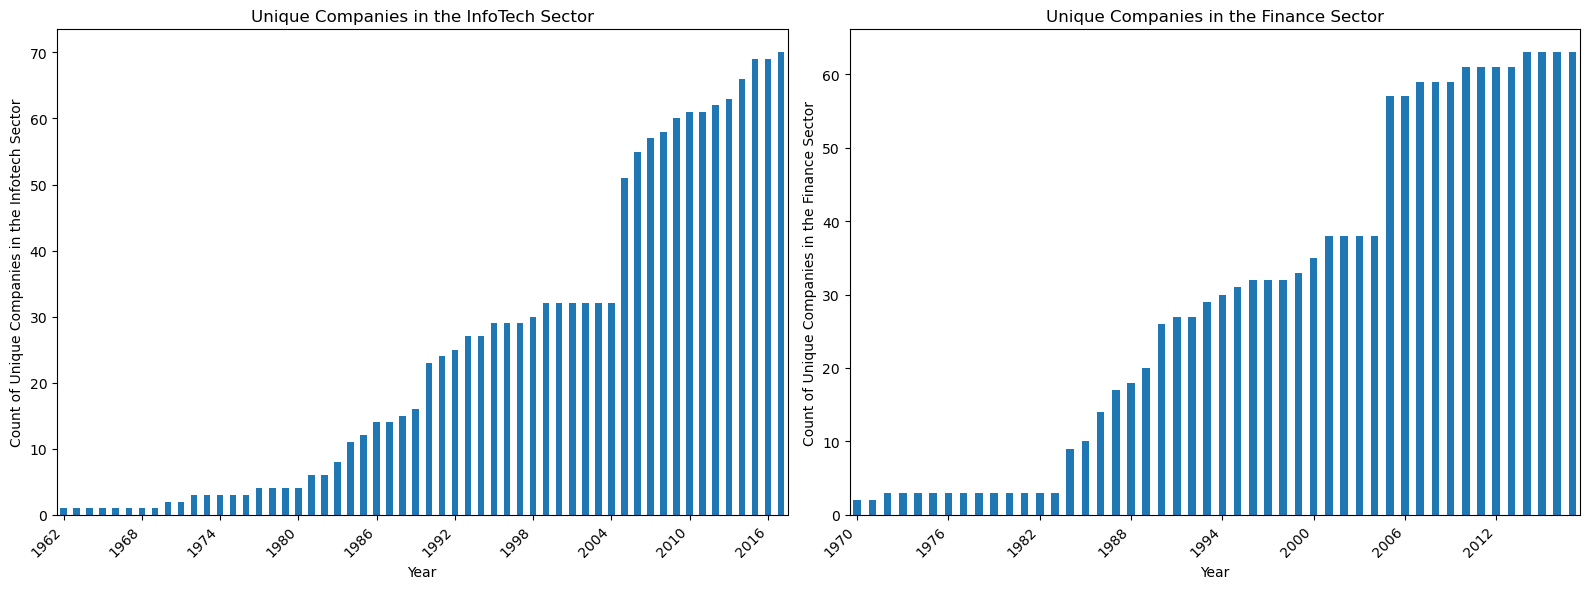

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Graph 1: Number of unique companies per year in infotech
infotech_companies_per_year = df_info_tech.groupby(df_info_tech['Date'].dt.year)['symbol'].nunique()
infotech_companies_per_year.plot(kind='bar', ax=ax1, title='Unique Companies in the InfoTech Sector')

ax1.xaxis.set_major_locator(MaxNLocator(nbins=len(infotech_companies_per_year)//5))
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")
ax1.set_xlabel('Year')
ax1.set_ylabel('Count of Unique Companies in the Infotech Sector')

# Graph 2: Number of unique companies per year in finance
finance_companies_per_year = df_finance.groupby(df_finance['Date'].dt.year)['symbol'].nunique()
finance_companies_per_year.plot(kind='bar', ax=ax2, title='Unique Companies in the Finance Sector')

ax2.xaxis.set_major_locator(MaxNLocator(nbins=len(finance_companies_per_year)//5))
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right")
ax2.set_xlabel('Year')
ax2.set_ylabel('Count of Unique Companies in the Finance Sector')


plt.tight_layout()
plt.show()


## Further Cleaning and analysis

We filtered the dataset to include only companies with complete data spanning the entire period from January 1, 2010, to January 1, 2017. This ensures consistency by retaining only companies with sufficient historical data for accurate long-term analysis. By verifying that each company's data starts before December 30, 2010, and extends through January 1, 2017, we eliminate companies with incomplete records, improving the reliability of portfolio and sector-level evaluations.


In [48]:
def filter_companies_with_full_data(df):

    #Filters a DataFrame to include only companies with data covering the entire specified period.

    # Convert dates to Timestamps if they are in string format
    start_date = pd.Timestamp('2010-01-01')
    end_date = pd.Timestamp('2017-01-01')
    middle_date = pd.Timestamp('2010-12-30')


    # Filter data to include only rows from the start date onward
    df_filtered = df[df['Date'] >= start_date]

    # Keep only companies that have data spanning the entire period from start to end
    df_filtered = df_filtered.groupby('symbol').filter(
        lambda x: x['Date'].min() <= middle_date and x['Date'].max() >= end_date
    )

    return df_filtered


df_info_tech = filter_companies_with_full_data(df_info_tech)
df_finance = filter_companies_with_full_data(df_finance)

df_finance.head(10)

,Date,Open,High,Low,Close,Volume,symbol
6418,2010-01-04,39.369999,40.386002,39.369999,40.277000,2776338.0,AFL
6419,2010-01-05,40.208000,41.555000,39.845001,41.445999,4683253.0,AFL
6420,2010-01-06,41.875999,42.189999,41.250000,41.810001,3455543.0,AFL
6421,2010-01-07,41.834999,42.333000,41.487999,42.257000,3269343.0,AFL
6422,2010-01-08,42.046001,42.046001,41.276001,41.834999,2594388.0,AFL
6423,2010-01-11,42.222000,42.993999,42.088001,42.937000,3365544.0,AFL
6424,2010-01-12,43.511002,43.790001,42.563000,42.716000,4545625.0,AFL
6425,2010-01-13,42.860001,43.282001,42.698002,43.181000,3014124.0,AFL
6426,2010-01-14,43.314999,43.851002,42.910999,43.747002,2677321.0,AFL
6427,2010-01-15,43.646000,43.798000,42.903999,43.272999,3513341.0,AFL


### Stock is Weighted by Trading Volume

We weighted stocks by volume to account for their relative trading activity, ensuring that stocks with higher liquidity—those traded more actively with greater market participation—contribute more significantly to the aggregated metrics. This approach reduces the impact of thinly traded stocks, which are less representative of market sentiment and can introduce noise. Due to the absence of market cap data, volume serves as a practical proxy for significance, resulting in a dataset that better reflects the overall portfolio dynamics.

We aggregate and weight stock data by trading volume to create a portfolio-level representation. It calculates each stock’s volume weight as a proportion of total daily volume, adjusts the OHLC prices accordingly, and aggregates these weighted values across all stocks for each day. This approach accounts for trading activity, ensures higher liquidity stocks have greater influence, and mitigates noise from less liquid stocks, providing a comprehensive view of portfolio performance without relying on market cap data.

In [49]:
def make_weighted_data(df):
    # We calculate Volume_Weight as the proportion of each company's volume to the total volume for that date
    df['Volume_Weight'] = df['Volume'] / df.groupby('Date')['Volume'].transform('sum')

    # We proceed to weight the OHLC features by Volume_Weight
    df['Open'] = df['Open'] * df['Volume_Weight']
    df['High'] = df['High'] * df['Volume_Weight']
    df['Low'] = df['Low'] * df['Volume_Weight']
    df['Close'] = df['Close'] * df['Volume_Weight']

    # We add a relative volume column for each row
    df['Volume'] = df.groupby('Date')['Volume'].transform('sum')

    # We group by Date and aggregate to reduce company symbols
    df = df.groupby('Date').agg({
        'Open': 'sum',
        'High': 'sum',
        'Low': 'sum',
        'Close': 'sum',
        'Volume': 'sum', 
    }).reset_index()

    return df


df_info_tech = make_weighted_data(df_info_tech)
df_finance = make_weighted_data(df_finance)


Using features like Quarter, Month, and Day of the Week is more valuable than just relying on the Year when analyzing stock market trends. Stock movements often follow seasonal patterns, with performance varying based on the time of year. For instance, some industries excel in Q4 due to the holiday season, while the market may underperform in months like May. Similarly, Day of the Week impacts trading behavior, as traders often close positions on Fridays before the weekend. Incorporating these components in the dataset enhances machine learning models by capturing these time-based patterns, improving predictions for time-series data.

E.g. Some industries perform better in certain quarters like Q4 due to holiday season.
The stock market tends to have certain months with bad performance such as May.
Day of the week also affect as traders tend to close positions on friday before the weekend.

In [50]:
# First round of cleaning completed

date_dfs = [df_info_tech, df_finance]

for dfs in date_dfs:
    dfs.loc[:, 'Year'] = dfs['Date'].dt.year
    dfs.loc[:, 'DayOfWeek'] = dfs['Date'].dt.dayofweek
    dfs.loc[:, 'Month'] = dfs['Date'].dt.month
    dfs.loc[:, 'Quarter'] = dfs['Date'].dt.quarter

## Feature Engineering


Through feature engineering, we provide the model with relevant insights into market behavior, enabling it to better capture trends, momentum, and anomalies for more accurate predictions of the next day's closing returns. We introduced additional features to enhance the model's ability to predict the next day's closing returns:

1. **Moving Averages**: We computed 5-day and 10-day moving averages based on the Close price for each stock/ETF. These averages help the model identify short-term and medium-term momentum, signaling whether the stock is trending upward or downward.
2. **Volatility**: Volatility is calculated as the percentage difference between the High and Low prices for each day. High volatility reflects significant price swings, allowing the model to estimate the probability of notable upward or downward movements.
3. **Volume Moving Average**: We calculated the 5-day moving average of the trading Volume to capture volume trends. Spikes in volume often validate price trends, enabling the model to make stronger predictions by combining volume changes with price movements.

These features provide the model with richer context about trends, momentum, and market activity, improving its prediction accuracy.


In [51]:
# Sort the data chronologically so that we can prepare it for feature engineering
df_info_tech = df_info_tech.sort_values(by=['Date'])
df_finance = df_finance.sort_values(by=['Date'])

# Volatility for price fluctuation: A spike in volatility might signal that the stock is about to move significantly, helping the model predict a potential upward or downward move.
df_info_tech['Volatility'] = (df_info_tech['High'] - df_info_tech['Low']) / df_info_tech['Low'] * 100
df_finance['Volatility'] = (df_finance['High'] - df_finance['Low']) / df_finance['Low'] * 100

# Volume as a Confirmation Signal: Rising volume often accompanies a price move -> increasing volume (strong buyer interest signal price increase), lower volume (less interest, lead to price drops)
df_info_tech['Volume_MA_5'] = df_info_tech['Volume'].rolling(window=5).mean()
df_finance['Volume_MA_5'] = df_finance['Volume'].rolling(window=5).mean()

# Calculate the 5-day and 10-day EMA of the closing price
df_info_tech['Close_EMA_5'] = df_info_tech['Close'].ewm(span=5, adjust=False).mean()
df_info_tech['Close_EMA_10'] = df_info_tech['Close'].ewm(span=10, adjust=False).mean()

df_finance['Close_EMA_5'] = df_finance['Close'].ewm(span=5, adjust=False).mean()
df_finance['Close_EMA_10'] = df_finance['Close'].ewm(span=10, adjust=False).mean()

df_info_tech.head(20)
df_finance.head(20)


,Date,Open,High,Low,Close,Volume,Year,DayOfWeek,Month,Quarter,Volatility,Volume_MA_5,Close_EMA_5,Close_EMA_10
0,2010-01-04,23.512703,24.043062,23.348316,23.879389,3.579748e+10,2010,0,1,1,2.975572,NaN,23.879389,23.879389
1,2010-01-05,24.176277,24.808779,24.051495,24.693159,4.521913e+10,2010,1,1,1,3.148595,NaN,24.150646,24.027347
2,2010-01-06,23.616268,24.010599,23.363884,23.806154,3.974633e+10,2010,2,1,1,2.768012,NaN,24.035815,23.987130
3,2010-01-07,21.066645,21.724751,20.877972,21.499687,5.982976e+10,2010,3,1,1,4.055848,NaN,23.190439,23.534868
4,2010-01-08,23.272005,23.538986,22.883436,23.206528,4.091369e+10,2010,4,1,1,2.864736,4.430128e+10,23.195802,23.475170
5,2010-01-11,23.732822,23.875000,23.313725,23.547831,3.429807e+10,2010,0,1,1,2.407490,4.400140e+10,23.313145,23.488381
6,2010-01-12,23.728338,23.914572,23.173210,23.412750,4.485347e+10,2010,1,1,1,3.199219,4.392827e+10,23.346347,23.474630
7,2010-01-13,22.981543,23.416193,22.668365,23.195789,4.066964e+10,2010,2,1,1,3.298992,4.411293e+10,23.296161,23.423931
8,2010-01-14,23.342701,23.708786,23.173092,23.536779,3.520861e+10,2010,3,1,1,2.311708,3.918870e+10,23.376367,23.444449
9,2010-01-15,24.528975,24.625166,23.962727,24.146561,4.628057e+10,2010,4,1,1,2.764457,4.026207e+10,23.633098,23.572106


We proceed to add 2 more features:

**Relative Strength Index (RSI)**: RSI measures recent price changes to identify overbought or oversold conditions, ranging from 0 to 100. Values above 70 indicate potential corrections, while below 30 signal possible price increases, helping the model detect momentum shifts.

**Moving Average Convergence Divergence (MACD)**: MACD compares two EMAs (e.g., 12-day and 26-day) to identify trend strength and direction. Crossovers generate bullish or bearish signals, aiding the model in capturing long-term momentum and potential reversals.

These features enhance the model's ability to predict price movements by leveraging momentum and trend indicators.

In [52]:
# Adding new features RSI and MACD

def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_macd(data, short_window=12, long_window=26):
    # Calculate short-term and long-term EMAs
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()

    # Calculate MACD
    macd = short_ema - long_ema
    macd[:long_window - 1] = np.nan

    return macd

# Calculate MACD and RSI for the entire DataFrame
df_info_tech['MACD'] = calculate_macd(df_info_tech)
df_finance['MACD'] = calculate_macd(df_finance)

df_info_tech['RSI'] = calculate_rsi(df_info_tech)
df_finance['RSI'] = calculate_rsi(df_finance)

# Drop rows with missing values
df_info_tech = df_info_tech.dropna(subset=['MACD', 'RSI', 'Volume_MA_5'])
df_finance = df_finance.dropna(subset=['MACD', 'RSI', 'Volume_MA_5'])

# Check for missing values
print(df_info_tech.isna().sum())
print(df_finance.isna().sum())

# Display the data
df_info_tech.head(20)
df_finance.head(20)


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Year            0
DayOfWeek       0
Month           0
Quarter         0
Volatility      0
Volume_MA_5     0
Close_EMA_5     0
Close_EMA_10    0
MACD            0
RSI             0
dtype: int64
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Year            0
DayOfWeek       0
Month           0
Quarter         0
Volatility      0
Volume_MA_5     0
Close_EMA_5     0
Close_EMA_10    0
MACD            0
RSI             0
dtype: int64


,Date,Open,High,Low,Close,Volume,Year,DayOfWeek,Month,Quarter,Volatility,Volume_MA_5,Close_EMA_5,Close_EMA_10,MACD,RSI
25,2010-02-09,22.603748,22.914349,22.162970,22.548494,4.827889e+10,2010,1,2,1,3.390245,5.164164e+10,22.694129,22.968113,-0.223249,49.558081
26,2010-02-10,21.971214,22.623343,21.800734,22.326138,4.068493e+10,2010,2,2,1,3.773309,5.081907e+10,22.571465,22.851390,-0.262304,45.444114
27,2010-02-11,23.587151,23.926510,23.281307,23.607527,3.464366e+10,2010,3,2,1,2.771333,4.574826e+10,22.916819,22.988870,-0.187694,51.271082
28,2010-02-12,22.821321,23.093243,22.552042,22.970924,3.738641e+10,2010,4,2,1,2.399786,4.098400e+10,22.934854,22.985607,-0.177882,51.898006
29,2010-02-16,23.052984,23.598377,22.894871,23.507099,3.757364e+10,2010,1,2,1,3.072769,3.971351e+10,23.125602,23.080424,-0.125397,56.936219
30,2010-02-17,22.776655,23.076492,22.493786,22.805561,4.298673e+10,2010,2,2,1,2.590522,3.865507e+10,23.018922,23.030449,-0.138810,48.703090
31,2010-02-18,22.265583,22.662863,22.173220,22.507547,3.698643e+10,2010,3,2,1,2.208263,3.791537e+10,22.848464,22.935376,-0.171510,49.842195
32,2010-02-19,23.091526,23.537590,23.009701,23.342827,3.885752e+10,2010,4,2,1,2.294203,3.875815e+10,23.013251,23.009458,-0.128543,47.259066
33,2010-02-22,22.696293,23.163774,22.576378,22.942511,3.708997e+10,2010,0,2,1,2.601820,3.869886e+10,22.989671,22.997286,-0.125348,48.775049
34,2010-02-23,24.732481,25.024714,24.210522,24.344290,4.132249e+10,2010,1,2,1,3.362967,3.944863e+10,23.441211,23.242195,-0.009594,51.748174


### Adding Next Day's Returns 

We calculated the next day’s return as the percentage change between the current day’s closing price and the following day’s closing price. This was achieved by creating a Close_next column with the next day’s closing price using a shifted index and then computing the percentage return.

Next day returns were chosen as the target variable because they allow us to predict short-term market movements, aligning with strategies that rely on daily rebalancing or trading decisions. This approach provides actionable insights while capturing meaningful trends in stock price fluctuations. They signal whether a stock is likely to go up or down, which is crucial for decision-making. Unlike predicting exact stock prices, which is highly uncertain, predicting returns focuses on directional trends, offering actionable insights for short-term strategies.

In [53]:
# Calculating Next Day Pricing
def calculate_next_day_return(df):
    df = df.sort_values(by='Date')  
    df['Close_next'] = df['Close'].shift(-1)  
    df['Return_next'] = (df['Close_next'] - df['Close']) / df['Close']  
    df = df.dropna(subset=['Return_next'])  
    df.reset_index(drop=True, inplace=True) 
    return df

# Apply the function to both datasets
df_finance = calculate_next_day_return(df_finance)
df_info_tech = calculate_next_day_return(df_info_tech)

df_finance


,Date,Open,High,Low,Close,Volume,Year,DayOfWeek,Month,Quarter,Volatility,Volume_MA_5,Close_EMA_5,Close_EMA_10,MACD,RSI,Close_next,Return_next
0,2010-02-09,22.603748,22.914349,22.162970,22.548494,4.827889e+10,2010,1,2,1,3.390245,5.164164e+10,22.694129,22.968113,-0.223249,49.558081,22.326138,-0.009861
1,2010-02-10,21.971214,22.623343,21.800734,22.326138,4.068493e+10,2010,2,2,1,3.773309,5.081907e+10,22.571465,22.851390,-0.262304,45.444114,23.607527,0.057394
2,2010-02-11,23.587151,23.926510,23.281307,23.607527,3.464366e+10,2010,3,2,1,2.771333,4.574826e+10,22.916819,22.988870,-0.187694,51.271082,22.970924,-0.026966
3,2010-02-12,22.821321,23.093243,22.552042,22.970924,3.738641e+10,2010,4,2,1,2.399786,4.098400e+10,22.934854,22.985607,-0.177882,51.898006,23.507099,0.023341
4,2010-02-16,23.052984,23.598377,22.894871,23.507099,3.757364e+10,2010,1,2,1,3.072769,3.971351e+10,23.125602,23.080424,-0.125397,56.936219,22.805561,-0.029844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,2017-11-03,60.400681,60.836670,59.937557,60.427074,1.259690e+10,2017,4,11,4,1.500082,1.335458e+10,59.110831,58.010778,1.403354,59.804766,57.806755,-0.043363
1950,2017-11-06,57.679588,58.068253,57.403019,57.806755,1.090277e+10,2017,0,11,4,1.158883,1.303129e+10,58.676139,57.973683,1.307685,42.281846,54.706558,-0.053630
1951,2017-11-07,55.506374,55.801163,54.494865,54.706558,1.619317e+10,2017,1,11,4,2.397102,1.349059e+10,57.352945,57.379660,0.970518,45.647604,53.772545,-0.017073
1952,2017-11-08,53.950207,54.147858,53.365982,53.772545,1.684695e+10,2017,2,11,4,1.465120,1.440526e+10,56.159479,56.723821,0.620789,46.265752,50.371380,-0.063251


## Data Splitting

Before feature selection, we first split the dataset into training, validation, and testing data set. We split the time series data chronologically to preserve the natural order of events, ensuring the training set uses past data to predict future outcomes.

This approach avoids data leakage and better reflects real-world scenarios where future data is unavailable during model training.


In [54]:
def split_data(df, target_column, dataset_name, train_ratio=0.8, val_ratio=0.1):

    # We first sort by date
    df = df.sort_values(by='Date')
    
    # We then define split indices
    train_split_index = int(len(df) * train_ratio)
    val_split_index = int(len(df) * (train_ratio + val_ratio))
    
    # We split the data
    X_train = df.iloc[:train_split_index].drop(columns=[target_column])
    X_val = df.iloc[train_split_index:val_split_index].drop(columns=[target_column])
    X_test = df.iloc[val_split_index:].drop(columns=[target_column])

    y_train = df.iloc[:train_split_index][target_column]
    y_val = df.iloc[train_split_index:val_split_index][target_column]
    y_test = df.iloc[val_split_index:][target_column]
    
    # Print the sizes of each set
    print(f"{dataset_name} - X_train size: {X_train.shape}")
    print(f"{dataset_name} - X_val size: {X_val.shape}")
    print(f"{dataset_name} - X_test size: {X_test.shape}")
    print(f"{dataset_name} - y_train size: {y_train.shape}")
    print(f"{dataset_name} - y_val size: {y_val.shape}")
    print(f"{dataset_name} - y_test size: {y_test.shape}")
    print(" ")
    
    return X_train, X_val, X_test, y_train, y_val, y_test

print("======Data Splitting for both sectors======")
X_train_finance, X_val_finance, X_test_finance, y_train_finance, y_val_finance, y_test_finance = split_data(df_finance, 'Return_next', 'Finance')

X_train_info_tech, X_val_info_tech, X_test_info_tech, y_train_info_tech, y_val_info_tech, y_test_info_tech = split_data(df_info_tech, 'Return_next', 'Info Tech')


======Data Splitting for both sectors======
Finance - X_train size: (1563, 17)
Finance - X_val size: (195, 17)
Finance - X_test size: (196, 17)
Finance - y_train size: (1563,)
Finance - y_val size: (195,)
Finance - y_test size: (196,)
 
Info Tech - X_train size: (1563, 17)
Info Tech - X_val size: (195, 17)
Info Tech - X_test size: (196, 17)
Info Tech - y_train size: (1563,)
Info Tech - y_val size: (195,)
Info Tech - y_test size: (196,)
 


# Feature selection process


With feature engineering complete, we now move to feature selection to identify the most relevant variables for predicting the next day's close price. This step is critical to reduce overfitting, improve model interpretability, and enhance prediction accuracy by focusing on impactful features while discarding noise.

**Lasso Regression**: Lasso adds a penalty for the magnitude of coefficients, shrinking less important features to zero. This helps in selecting only the most influential predictors, ideal for sparse datasets or when many features are potentially irrelevant.

**Principal Component Analysis (PCA)**: PCA reduces dimensionality by combining correlated features into principal components while retaining maximum variance. It helps us simplify the feature space, especially useful when dealing with high-dimensional data like ours.

**XGBoost**: XGBoost ranks feature importance during training using tree-based models, identifying which features contribute most to predictive performance. This is valuable for understanding feature interactions and leveraging non-linear relationships.

Using these methods, we ensure our model is both efficient and robust, focusing only on features that significantly improve prediction accuracy in the context of stock price forecasting.

### 1. Hyperparameter tuning for using Lasso for selecting the best features

We train a Lasso regression model with optimal hyperparameters for feature selection in the Finance and Info-Tech datasets. It scales the data using StandardScaler, performs time series cross-validation with TimeSeriesSplit, and uses GridSearchCV to find the best alpha value for Lasso. We use TimeSeriesSplit because stock market data is inherently sequential and time-dependent. Unlike random splits, TimeSeriesSplit preserves the temporal order by ensuring that the validation set always follows the training set.

The process ensures robust feature selection tailored to the temporal nature of stock market data, reducing overfitting while identifying the most impactful predictors for each dataset.

In [55]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit


# Drop 'Date' globally for finance and info_tech datasets
X_train_finance = X_train_finance.drop(columns=['Date'], errors='ignore')
X_val_finance = X_val_finance.drop(columns=['Date'], errors='ignore')
X_test_finance = X_test_finance.drop(columns=['Date'], errors='ignore')

X_train_info_tech = X_train_info_tech.drop(columns=['Date'], errors='ignore')
X_val_info_tech = X_val_info_tech.drop(columns=['Date'], errors='ignore')
X_test_info_tech = X_test_info_tech.drop(columns=['Date'], errors='ignore')


def train_lasso_model(X_train, X_val, X_test, y_train, dataset_name):

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Perform Time Series Cross-Validation
    tscv = TimeSeriesSplit(n_splits=5)
    lasso_cv = GridSearchCV(
        Lasso(max_iter=5000),
        param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
        scoring='neg_mean_squared_error',
        cv=tscv
    )

    # Fit the model
    lasso_cv.fit(X_train_scaled, y_train)
    best_alpha = lasso_cv.best_params_['alpha']

    print(f"{dataset_name} - Best alpha: {best_alpha}")
    return best_alpha, X_train_scaled, X_val_scaled, X_test_scaled


best_alpha_finance, X_train_scaled_finance, X_val_scaled_finance, X_test_scaled_finance = train_lasso_model(X_train_finance, X_val_finance, X_test_finance, y_train_finance, "Finance")

best_alpha_info_tech, X_train_scaled_info_tech, X_val_scaled_info_tech, X_test_scaled_info_tech = train_lasso_model(X_train_info_tech, X_val_info_tech, X_test_info_tech, y_train_info_tech, "Info Tech")



Finance - Best alpha: 0.001
Info Tech - Best alpha: 0.001


The optimal alpha value obtained through GridSearchCV for both datasets was 0.001. This indicates minimal regularization is needed, and we will use this alpha parameter to train our final Lasso models for feature selection and prediction

### Feature Selection using Lasso


We used Lasso regression as a feature selection technique to identify the most impactful predictors for next-day returns. By applying regularization, Lasso shrinks less relevant feature coefficients to zero, effectively filtering out noise and retaining only the most influential variables. This approach ensures a streamlined and interpretable feature set, enhancing model accuracy and robustness.

In [56]:
from sklearn.metrics import mean_absolute_error, r2_score

def apply_lasso_and_evaluate(alpha, X_train_scaled, X_val_scaled, y_train, y_val, feature_columns, dataset_name):
    # We apply Lasso
    lasso = Lasso(alpha=alpha, max_iter=5000)
    lasso.fit(X_train_scaled, y_train)

    # We predict and evaluate using the lasso
    y_pred = lasso.predict(X_val_scaled)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    print(f"===== Lasso Metric Evaluation {dataset_name} ===== ")
    print(f"{dataset_name} - Mean Squared Error (MSE): {mse}")
    print(f"{dataset_name} - Mean Absolute Error (MAE): {mae}")
    print(f"{dataset_name} - R-squared (R²): {r2}")

    # Select features with non-zero coefficients
    selected_features = feature_columns[:lasso.coef_.shape[0]][lasso.coef_ != 0]
    print(f"{dataset_name} - Selected features by Lasso: {selected_features.tolist()}")
    print(" ")

    return mse, mae, r2, selected_features.tolist(), lasso



mse_finance, mae_finance, r2_finance, selected_features_lasso_finance, lasso_finance = apply_lasso_and_evaluate(
    best_alpha_finance, 
    X_train_scaled_finance, 
    X_val_scaled_finance, 
    y_train_finance, 
    y_val_finance, 
    X_train_finance.columns, 
    "Finance"
)

mse_info_tech, mae_info_tech, r2_info_tech, selected_features_lasso_info_tech, lasso_infotech = apply_lasso_and_evaluate(
    best_alpha_info_tech, 
    X_train_scaled_info_tech, 
    X_val_scaled_info_tech, 
    y_train_info_tech, 
    y_val_info_tech, 
    X_train_info_tech.columns, 
    "Info Tech"
)


===== Lasso Metric Evaluation Finance ===== 
Finance - Mean Squared Error (MSE): 0.00014392982987042167
Finance - Mean Absolute Error (MAE): 0.008307777123302506
Finance - R-squared (R²): 0.9497025180841638
Finance - Selected features by Lasso: ['High', 'Close', 'Volume', 'Volatility', 'Volume_MA_5', 'RSI', 'Close_next']
 
===== Lasso Metric Evaluation Info Tech ===== 
Info Tech - Mean Squared Error (MSE): 0.00016153062314393332
Info Tech - Mean Absolute Error (MAE): 0.009194628338104728
Info Tech - R-squared (R²): 0.9732827433206209
Info Tech - Selected features by Lasso: ['High', 'Low', 'Close', 'DayOfWeek', 'RSI', 'Close_next']
 


The Lasso evaluation shows strong performance, with high R² values for both Finance and Info Tech, indicating the models explain most of the variance in the data. The MSE and MAE are low, reflecting accurate predictions.

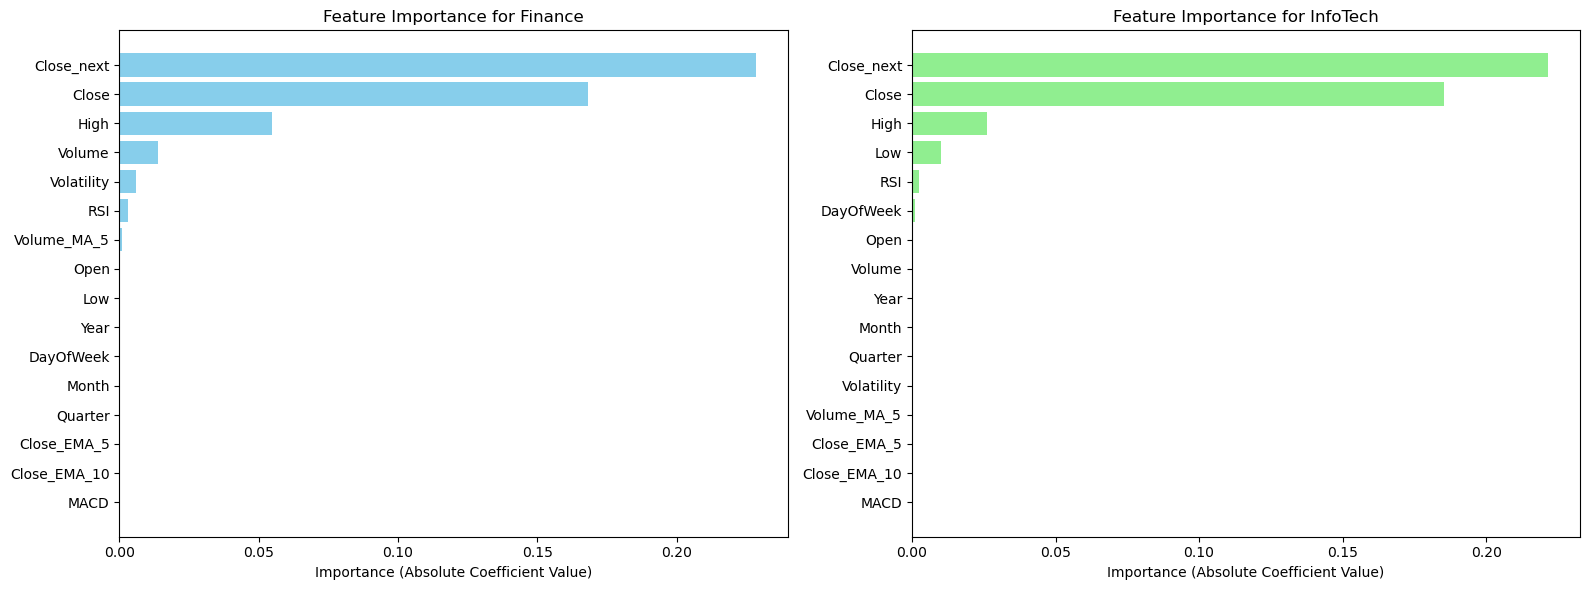

In [57]:
# We plot the results side by side for easy viewing
coef_df1 = pd.DataFrame({
    'Feature': X_train_finance.columns,
    'Importance': np.abs(lasso_finance.coef_)
}).sort_values(by='Importance', ascending=False)

coef_df2 = pd.DataFrame({
    'Feature': X_train_info_tech.columns,
    'Importance': np.abs(lasso_infotech.coef_)
}).sort_values(by='Importance', ascending=False)


fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Plot for the finance dataset
axes[0].barh(coef_df1['Feature'], coef_df1['Importance'], color='skyblue')
axes[0].set_xlabel('Importance (Absolute Coefficient Value)')
axes[0].set_title('Feature Importance for Finance')
axes[0].invert_yaxis()  

# Plot for the info tech dataset
axes[1].barh(coef_df2['Feature'], coef_df2['Importance'], color='lightgreen')
axes[1].set_xlabel('Importance (Absolute Coefficient Value)')
axes[1].set_title('Feature Importance for InfoTech')
axes[1].invert_yaxis()  

plt.tight_layout()
plt.show()


### 2. Hyperparameter tuning for using XGBoost for selecting the best features

We used XGBoost with randomized hyperparameter search to optimize the model for predicting next-day returns in Finance and Info-Tech datasets. By testing multiple parameter combinations (e.g., learning rate, tree depth, regularization) with time-series cross-validation across different fold sizes, we identified the best-performing model and its hyperparameters, ensuring robust predictions tailored to the temporal nature of the data.

In [60]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_xgb_with_time_series_split(X_train, y_train, X_val, y_val, dataset_name, n_splits=5):

    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],  
        'learning_rate': [0.01, 0.05, 0.1, 0.2],  
        'max_depth': [3, 5, 7, 10],  
        'min_child_weight': [1, 3, 5],  
        'subsample': [0.6, 0.8, 1.0],  
        'colsample_bytree': [0.6, 0.8, 1.0],  
        'gamma': [0, 0.1, 0.2],  
        'reg_alpha': [0, 0.01, 0.1],  
        'reg_lambda': [1, 1.5, 2],  
    }

    # Initialize the XGBoost regressor
    xgb = XGBRegressor(random_state=42)

    # Use TimeSeriesSplit for cross-validation
    tscv = TimeSeriesSplit(n_splits=n_splits)
    random_search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_grid,
        n_iter=100,
        scoring='neg_mean_squared_error',
        cv=tscv,
        n_jobs=-1,
        random_state=42
    )

    # Fit the RandomizedSearchCV
    random_search.fit(X_train, y_train)

    # Output the best hyperparameters
    best_params = random_search.best_params_
    print(f"===== XGBoost Metric Evaluation {dataset_name} ===== ")
    print(f"{dataset_name} - Best Hyperparameters:", best_params)

    # Evaluate the best model on the validation set
    best_model = random_search.best_estimator_
    y_val_pred = best_model.predict(X_val)

    mse = mean_squared_error(y_val, y_val_pred)
    mae = mean_absolute_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)

    print(f"{dataset_name} - Validation Mean Squared Error (MSE): {mse:.4f}")
    print(f"{dataset_name} - Validation Mean Absolute Error (MAE): {mae:.4f}")
    print(f"{dataset_name} - Validation R-squared (R²): {r2:.4f}")

    # Feature importance
    feature_importances = best_model.feature_importances_

    return best_model, best_params, mse, mae, r2, feature_importances


# Train XGBoost models for both datasets
best_model_finance, best_params_finance, mse_finance, mae_finance, r2_finance, feature_importances_finance = train_xgb_with_time_series_split(
    X_train_finance, y_train_finance, X_val_finance, y_val_finance, "Finance", n_splits=10
)

best_model_info_tech, best_params_info_tech, mse_info_tech, mae_info_tech, r2_info_tech, feature_importances_info_tech = train_xgb_with_time_series_split(
    X_train_info_tech, y_train_info_tech, X_val_info_tech, y_val_info_tech, "Info Tech", n_splits=10
)


===== XGBoost Metric Evaluation Finance ===== 
Finance - Best Hyperparameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Finance - Validation Mean Squared Error (MSE): 0.0006
Finance - Validation Mean Absolute Error (MAE): 0.0156
Finance - Validation R-squared (R²): 0.7948
===== XGBoost Metric Evaluation Info Tech ===== 
Info Tech - Best Hyperparameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Info Tech - Validation Mean Squared Error (MSE): 0.0005
Info Tech - Validation Mean Absolute Error (MAE): 0.0142
Info Tech - Validation R-squared (R²): 0.9252


### 2. Feature selection using XGBoost

We used XGBoost with randomized hyperparameter search to identify the best-performing model for predicting next-day returns. By iterating over different fold sizes in a time-series split, we optimized parameters such as learning rate, tree depth, and regularization terms. This approach not only evaluates model performance but also highlights the most influential features based on feature importance scores from the best XGBoost model, making it a robust feature selection technique tailored to our dataset.

### XGBoost for Finance


This code fits the XGBoost model with the best-tuned hyperparameters to both datasets, leveraging its robust tree-based architecture for feature selection. By extracting feature importance scores, it identifies which variables contribute most to predicting next-day returns. To refine the feature set, we apply a threshold, selecting features with importance scores above 0.05, ensuring that only impactful predictors are retained. This process enhances the model's interpretability and efficiency by focusing on the most relevant variables while reducing noise from less significant features.

In [61]:
# Fit XGBoost model with tuned hyperparameters
xgb_finance = XGBRegressor(
    n_estimators=200, 
    random_state=42, 
    max_depth=5, 
    learning_rate=0.1, 
    subsample=1.0,        
    colsample_bytree=1.0, 
    reg_alpha=0, 
    reg_lambda=2,         
    min_child_weight=3, 
    gamma=0
)

# Fit the model to training data
xgb_finance.fit(X_train_finance, y_train_finance)

# Get feature importances
feature_importances_xgboost_finance = pd.Series(xgb_finance.feature_importances_, index=X_train_finance.columns).sort_values(ascending=False)
print("XGBoost Feature Importances:\n", feature_importances_xgboost_finance)

# Select top features based on importance threshold
selected_features_xgb_finance = feature_importances_xgboost_finance[feature_importances_xgboost_finance > 0.05].index
print("Selected Features:", selected_features_xgb_finance)

XGBoost Feature Importances:
 High            0.237660
Close           0.134056
Low             0.112469
RSI             0.103265
Close_next      0.102019
Open            0.097340
Month           0.041160
Volume          0.034680
MACD            0.034463
Volatility      0.028177
Year            0.024207
DayOfWeek       0.020477
Close_EMA_10    0.013359
Close_EMA_5     0.011139
Volume_MA_5     0.005528
Quarter         0.000000
dtype: float32
Selected Features: Index(['High', 'Close', 'Low', 'RSI', 'Close_next', 'Open'], dtype='object')


### XGBoost for Infotech

In [62]:
# Fit XGBoost model with tuned hyperparameters
xgb_infotech = XGBRegressor(
    n_estimators=200, 
    random_state=42, 
    max_depth=5, 
    learning_rate=0.1, 
    subsample=0.6,        
    colsample_bytree=0.8, 
    reg_alpha=0, 
    reg_lambda=1,         
    min_child_weight=3, 
    gamma=0
)


# Fit the model to training data
xgb_infotech.fit(X_train_info_tech, y_train_info_tech)

# Get feature importances
feature_importances_xgboost_infotech = pd.Series(xgb_infotech.feature_importances_, index=X_train_info_tech.columns).sort_values(ascending=False)
print("XGBoost Feature Importances:\n", feature_importances_xgboost_infotech)

# Select top features based on importance threshold
selected_features_xgb_infotech = feature_importances_xgboost_infotech[feature_importances_xgboost_infotech > 0.05].index
print("Selected Features:", selected_features_xgb_infotech)


XGBoost Feature Importances:
 Low             0.150150
Close_next      0.144434
High            0.139222
Open            0.127082
Close           0.119142
Year            0.068196
RSI             0.064255
Close_EMA_5     0.030145
Close_EMA_10    0.028955
DayOfWeek       0.027507
MACD            0.026722
Volatility      0.019534
Quarter         0.016649
Month           0.016402
Volume          0.013752
Volume_MA_5     0.007853
dtype: float32
Selected Features: Index(['Low', 'Close_next', 'High', 'Open', 'Close', 'Year', 'RSI'], dtype='object')


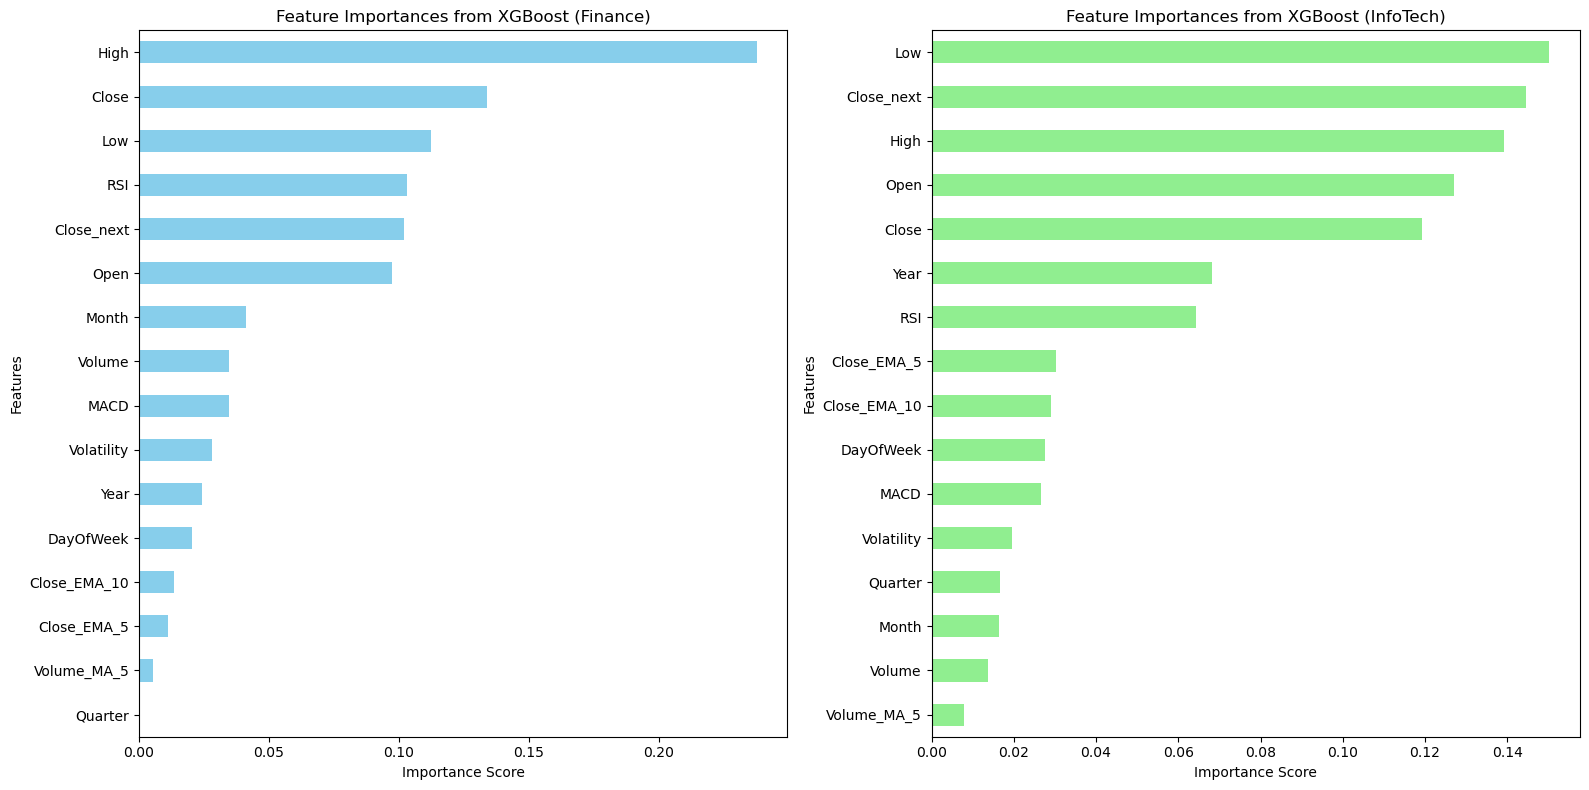

In [63]:
# We Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)

# Plot for the finance dataset
feature_importances_xgboost_finance.sort_values(ascending=True).plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title("Feature Importances from XGBoost (Finance)")
axes[0].set_xlabel("Importance Score")
axes[0].set_ylabel("Features")

# Plot for the info tech dataset
feature_importances_xgboost_infotech.sort_values(ascending=True).plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_title("Feature Importances from XGBoost (InfoTech)")
axes[1].set_xlabel("Importance Score")
axes[1].set_ylabel("Features")

plt.tight_layout()
plt.show()

### 3. Feature selection using PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms data into a set of uncorrelated components, called principal components, ranked by the amount of variance they capture. It simplifies high-dimensional datasets by retaining the most important features that explain the majority of the variance, improving computational efficiency and reducing noise, while preserving the core structure of the data for analysis or modeling.

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()

def perform_pca_analysis(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    pca_components = pca.fit_transform(data_scaled)
    explained_variance = pca.explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance)
    pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

    return pca_df, explained_variance, cumulative_explained_variance

pca_df_finance, explained_variance_finance, cumulative_explained_variance_finance = perform_pca_analysis(
    X_train_finance
)
pca_df_infotech, explained_variance_infotech, cumulative_explained_variance_infotech = perform_pca_analysis(
    X_train_info_tech
)


### Elbow Plot

This scree plot shows the explained variance ratio for each principal component for the Finance and InfoTech datasets. The steep drop in the first few components indicates that the majority of variance in the data is captured by the first 2-3 components. The curve flattens significantly after the third component (elbow point), suggesting diminishing returns for additional components. Therefore, retaining the top 2 components would likely capture most of the dataset's variance while reducing dimensionality.

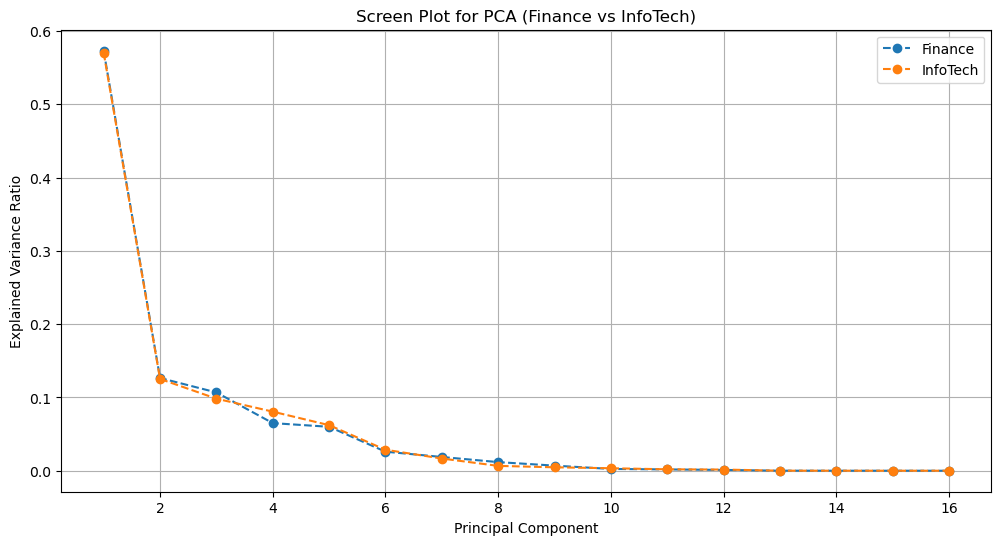

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance_finance) + 1), explained_variance_finance, marker='o', linestyle='--', label='Finance')
plt.plot(range(1, len(explained_variance_infotech) + 1), explained_variance_infotech, marker='o', linestyle='--', label='InfoTech')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Screen Plot for PCA (Finance vs InfoTech)')
plt.legend()
plt.grid(True)
plt.show()


In [66]:
# PCA for Finance
total_loadings = 2

pca_finance = PCA()
pca_finance.fit(StandardScaler().fit_transform(X_train_finance))
loadings_finance = pca_finance.components_[:total_loadings]
loadings_df_finance = pd.DataFrame(loadings_finance, columns=X_train_finance.columns, index=[f'PC{i+1}' for i in range(total_loadings)])

# PCA for InfoTech
pca_infotech = PCA()
pca_infotech.fit(StandardScaler().fit_transform(X_train_info_tech))
loadings_infotech = pca_infotech.components_[:total_loadings]
loadings_df_infotech = pd.DataFrame(loadings_infotech, columns=X_train_info_tech.columns, index=[f'PC{i+1}' for i in range(total_loadings)])

# Display the loadings to inspect the values
print("PCA Loadings Finance (contributions of original variables):")
print(loadings_df_finance)
print("================================================================================")
print(" ")
print("PCA Loadings InfoTech (contributions of original variables):")
print(loadings_df_infotech)


PCA Loadings Finance (contributions of original variables):
         Open      High       Low     Close    Volume      Year  DayOfWeek  \
PC1 -0.324239 -0.323802 -0.325219 -0.324636  0.260230 -0.269632   0.007936   
PC2  0.017643  0.019140  0.014561  0.016603  0.117553  0.136462   0.034072   

        Month   Quarter  Volatility  Volume_MA_5  Close_EMA_5  Close_EMA_10  \
PC1  0.001067  0.001439    0.199601     0.281654    -0.323046     -0.320819   
PC2 -0.686203 -0.683261    0.080292     0.094607     0.022457      0.027130   

         MACD       RSI  Close_next  
PC1 -0.078260 -0.063142   -0.319083  
PC2 -0.075103 -0.068703    0.022683  
 
PCA Loadings InfoTech (contributions of original variables):
         Open      High       Low     Close    Volume      Year  DayOfWeek  \
PC1 -0.325898 -0.325628 -0.326577 -0.326151  0.264291 -0.308754   0.011737   
PC2 -0.010934 -0.010662 -0.011570 -0.011057  0.043205  0.111441   0.032574   

        Month   Quarter  Volatility  Volume_MA_5  Close

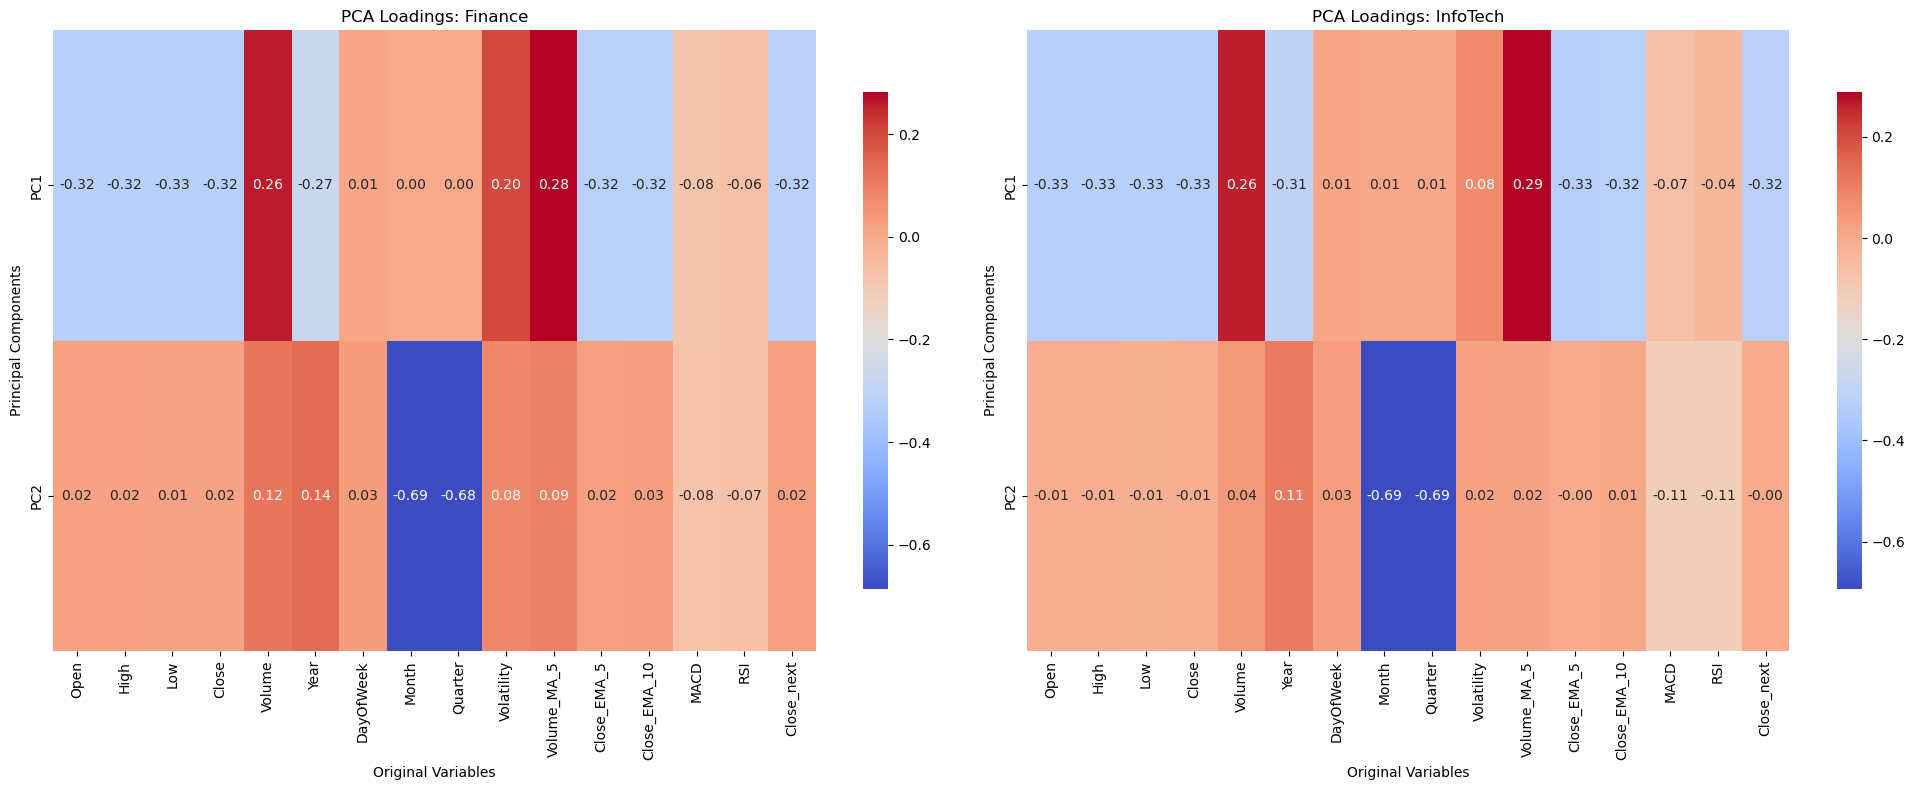

In [67]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap for PCA loadings (Finance)
sns.heatmap(loadings_df_finance, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'shrink': 0.8}, ax=axes[0])
axes[0].set_title('PCA Loadings: Finance')
axes[0].set_xlabel('Original Variables')
axes[0].set_ylabel('Principal Components')

# Heatmap for PCA loadings (InfoTech)
sns.heatmap(loadings_df_infotech, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'shrink': 0.8}, ax=axes[1])
axes[1].set_title('PCA Loadings: InfoTech')
axes[1].set_xlabel('Original Variables')
axes[1].set_ylabel('Principal Components')

plt.tight_layout()
plt.show()


We plotted this heatmap visualizes the PCA loadings for the first two principal components (PC1 and PC2) for the Finance and InfoTech datasets. The loadings indicate the contribution of each feature to the principal components. For example, features like RSI, Close, and Volume contribute significantly to PC1, while temporal features such as Month and Week dominate PC2. This analysis highlights which features are most impactful in capturing the variance in the data, aiding dimensionality reduction and feature importance understanding.

In [68]:
from sklearn.decomposition import PCA
import pandas as pd

def apply_pca(data_train, data_val, data_test, n_components):
 
    pca = PCA(n_components=n_components)
    train_pca = pca.fit_transform(data_train)
    val_pca = pca.transform(data_val)
    test_pca = pca.transform(data_test)

    train_pca_df = pd.DataFrame(train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
    val_pca_df = pd.DataFrame(val_pca, columns=[f'PC{i+1}' for i in range(n_components)])
    test_pca_df = pd.DataFrame(test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

    return train_pca_df, val_pca_df, test_pca_df

# For Finance
X_train_pca_df_finance, X_val_pca_df_finance, X_test_pca_df_finance = apply_pca(
    X_train_scaled_finance, X_val_scaled_finance, X_test_scaled_finance, total_loadings
)

# For InfoTech
X_train_pca_df_infotech, X_val_pca_df_infotech, X_test_pca_df_infotech = apply_pca(
    X_train_scaled_info_tech, X_val_scaled_info_tech, X_test_scaled_info_tech, total_loadings
)


We then apply PCA to reduce the dimensionality of the scaled Finance and InfoTech datasets. By transforming the training, validation, and test sets into a lower-dimensional space with n_components principal components (determined by total_loadings), it retains the most significant variance in the data. The resulting PCA-transformed datasets allow for more efficient and focused modeling while reducing noise and redundancy.

# Model Training and Hyperparameter Tuning for Prediction

## XGBoost Model For Finance Sector


This evaluates different feature selection methods (XGBoost, Lasso, and PCA) for predicting Finance dataset test set outcomes using the XGBoost model. For each feature set, the XGBoost regressor is trained with early stopping to prevent overfitting, using RMSE as the evaluation metric during training. Predictions are then made on the test set, and metrics like RMSE, MSE, and MAE are calculated to assess performance. XGBoost, with its ability to model non-linear relationships and handle feature importance effectively, is particularly suited for time-series data. By leveraging its tree-based architecture and robust handling of sequential dependencies, XGBoost offers reliable predictions for the next day's returns, with the best-performing feature set identified based on the lowest RMSE. We also made use of the parameters that were previously determined by XGBoost Feature Selection process.

In [69]:
# Feature sets for Finance
feature_sets_finance = {
    "XGBoost Features": X_train_finance[selected_features_xgb_finance],  # Features selected by XGBoost
    "Lasso Features": X_train_finance[selected_features_lasso_finance],  # Features selected by Lasso
    "PCA Features": X_train_pca_df_finance  # PCA-transformed components
}

# Dictionary to store evaluation results
results_finance = {}
predictions_finance = {}  


for method, X_train_set in feature_sets_finance.items():

    if method == "PCA Features":
        X_val_set = X_val_pca_df_finance
        X_test_set = X_test_pca_df_finance
    else:
        X_val_set = X_val_finance[selected_features_lasso_finance if method == "Lasso Features" else selected_features_xgb_finance]
        X_test_set = X_test_finance[selected_features_lasso_finance if method == "Lasso Features" else selected_features_xgb_finance]
    


    model = XGBRegressor(
        n_estimators=200, 
        random_state=42, 
        max_depth=5, 
        learning_rate=0.1, 
        subsample=0.6, 
        colsample_bytree=0.8, 
        reg_alpha=0, 
        reg_lambda=1, 
        min_child_weight=3, 
        gamma=0,
        early_stopping_rounds=10,
        eval_metric='rmse'
    )
    
    
    eval_set = [(X_train_set, y_train_finance), (X_val_set, y_val_finance)]

    # Fit the model with early stopping
    model.fit(
        X_train_set, y_train_finance,
        eval_set=eval_set, 
        verbose=False
    )

    # Make predictions on the test set
    y_pred = model.predict(X_test_set)
    predictions_finance[method] = y_pred

    # Calculate metrics on the test set
    mse_test = mean_squared_error(y_test_finance, y_pred)
    rmse_test = mse_test ** 0.5
    mae_test = mean_absolute_error(y_test_finance, y_pred)

    
    results_finance[method] = {
        "RMSE": rmse_test,
        "MSE": mse_test,
        "MAE": mae_test
    }
    print(f"{method}: Test RMSE = {rmse_test:.4f}, Test MSE = {mse_test:.4f}, Test MAE = {mae_test:.4f}")

# Find the best-performing feature set based on RMSE
best_feature_set_finance = min(results_finance, key=lambda x: results_finance[x]['RMSE'])
best_y_pred_finance = predictions_finance[best_feature_set_finance]  
print(f"\nBest Feature Set (Finance): {best_feature_set_finance}")
print(f"Best RMSE: {results_finance[best_feature_set_finance]['RMSE']:.4f}")
print(f"Best MSE: {results_finance[best_feature_set_finance]['MSE']:.4f}")
print(f"Best MAE: {results_finance[best_feature_set_finance]['MAE']:.4f}")


XGBoost Features: Test RMSE = 0.0459, Test MSE = 0.0021, Test MAE = 0.0354
Lasso Features: Test RMSE = 0.0470, Test MSE = 0.0022, Test MAE = 0.0367
PCA Features: Test RMSE = 0.0474, Test MSE = 0.0022, Test MAE = 0.0364

Best Feature Set (Finance): XGBoost Features
Best RMSE: 0.0459
Best MSE: 0.0021
Best MAE: 0.0354


Based on the above, Lasso Features performed the best for our XGBoost model

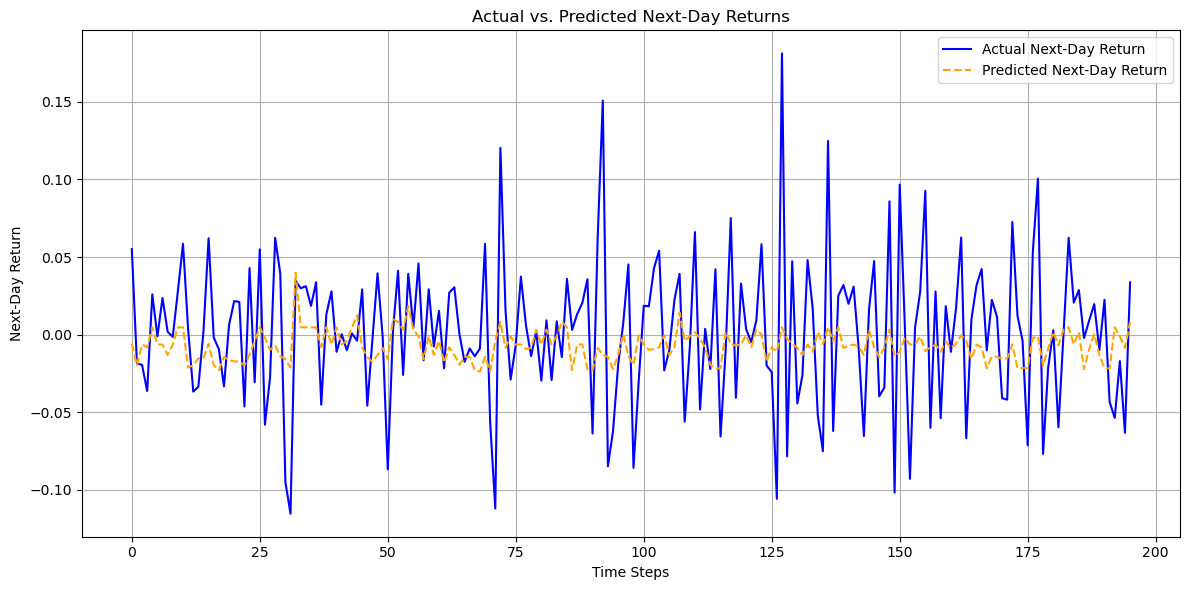

In [70]:

plt.figure(figsize=(12, 6))

# Ensure the predictions align with the actual test data's index
aligned_time_steps = range(len(y_test_finance))  

# Plot actual and predicted values
plt.plot(aligned_time_steps, y_test_finance, label='Actual Next-Day Return', color='blue')
plt.plot(aligned_time_steps, best_y_pred_finance, label='Predicted Next-Day Return', color='orange', linestyle='dashed')

plt.xlabel('Time Steps')
plt.ylabel('Next-Day Return')
plt.title('Actual vs. Predicted Next-Day Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## XGBoost Model For InfoTech Sector

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error as root_mean_squared_error
from xgboost import XGBRegressor

# Feature sets for Info Tech
feature_sets_info_tech = {
    "XGBoost Features": X_train_info_tech[selected_features_xgb_infotech],  # Features selected by XGBoost
    "Lasso Features": X_train_info_tech[selected_features_lasso_info_tech],  # Features selected by Lasso
    "PCA Features": X_train_pca_df_infotech  # PCA-transformed components
}


results_info_tech = {}
predictions_info_tech = {}  

# Iterate through feature sets
for method, X_train_set in feature_sets_info_tech.items():

    if method == "PCA Features":
        X_val_set = X_val_pca_df_infotech
        X_test_set = X_test_pca_df_infotech
    else:
        X_val_set = X_val_info_tech[selected_features_lasso_info_tech if method == "Lasso Features" else selected_features_xgb_infotech]
        X_test_set = X_test_info_tech[selected_features_lasso_info_tech if method == "Lasso Features" else selected_features_xgb_infotech]
    
    # Create the model
    model = XGBRegressor(
        n_estimators=200, 
        random_state=42, 
        max_depth=5, 
        learning_rate=0.1, 
        subsample=0.6, 
        colsample_bytree=0.8, 
        reg_alpha=0, 
        reg_lambda=1, 
        min_child_weight=3, 
        gamma=0,
        early_stopping_rounds=10,  
        eval_metric='rmse'         
    )

    
    eval_set = [(X_train_set, y_train_info_tech), (X_val_set, y_val_info_tech)]

    # Fit the model with early stopping
    model.fit(
        X_train_set, y_train_info_tech,
        eval_set=eval_set, 
        verbose=False
    )

    
    y_pred = model.predict(X_test_set)
    predictions_info_tech[method] = y_pred

    # Calculate metrics on the test set
    mse_test = mean_squared_error(y_test_info_tech, y_pred)
    rmse_test = mse_test ** 0.5
    mae_test = mean_absolute_error(y_test_info_tech, y_pred)

    # Store the results
    results_info_tech[method] = {
        "RMSE": rmse_test,
        "MSE": mse_test,
        "MAE": mae_test
    }
    print(f"{method}: Test RMSE = {rmse_test:.4f}, Test MSE = {mse_test:.4f}, Test MAE = {mae_test:.4f}")


best_feature_set_info_tech = min(results_info_tech, key=lambda x: results_info_tech[x]['RMSE'])
best_y_pred_info_tech = predictions_info_tech[best_feature_set_info_tech] 
print(f"\nBest Feature Set (Info Tech): {best_feature_set_info_tech}")
print(f"Best RMSE: {results_info_tech[best_feature_set_info_tech]['RMSE']:.4f}")
print(f"Best MSE: {results_info_tech[best_feature_set_info_tech]['MSE']:.4f}")
print(f"Best MAE: {results_info_tech[best_feature_set_info_tech]['MAE']:.4f}")


XGBoost Features: Test RMSE = 0.0592, Test MSE = 0.0035, Test MAE = 0.0430
Lasso Features: Test RMSE = 0.0579, Test MSE = 0.0034, Test MAE = 0.0421
PCA Features: Test RMSE = 0.0868, Test MSE = 0.0075, Test MAE = 0.0663

Best Feature Set (Info Tech): Lasso Features
Best RMSE: 0.0579
Best MSE: 0.0034
Best MAE: 0.0421


Based on the above, XGBoost Features performed the best for our XGBoost model for InfoTech

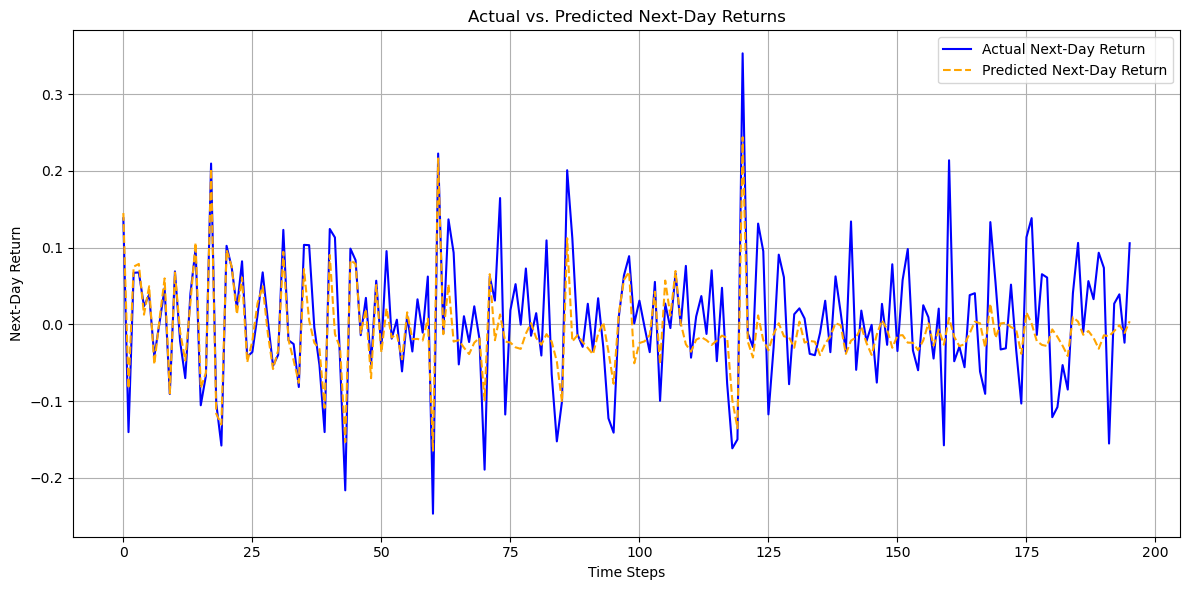

In [72]:

plt.figure(figsize=(12, 6))

# Ensure the predictions align with the actual test data's index
aligned_time_steps = range(len(y_test_info_tech))  

# Plot actual and predicted values
plt.plot(aligned_time_steps, y_test_info_tech, label='Actual Next-Day Return', color='blue')
plt.plot(aligned_time_steps, best_y_pred_info_tech, label='Predicted Next-Day Return', color='orange', linestyle='dashed')

plt.xlabel('Time Steps')
plt.ylabel('Next-Day Return')
plt.title('Actual vs. Predicted Next-Day Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

While the predicted values generally follow the overall trend, they appear smoothed compared to the actual returns, suggesting the model captures the broader pattern but struggles with extreme fluctuations. This highlights the model's effectiveness in predicting general trends but indicates potential limitations in capturing high-frequency noise or sharp price changes. This prompted us to explore other models that can better model the fluctuations of the next day's returns.

## LSTM Model for Finance Sector

With XGBoost providing strong performance and identifying key features for predicting next-day returns, we now move on to using Long Short-Term Memory (LSTM) networks. LSTMs are particularly suited for time-series data as they excel at capturing sequential dependencies and temporal patterns, enabling us to model stock market trends and dynamics more effectively over time. This transition leverages the strengths of deep learning for further improving predictive accuracy.

### Hyperparameter tuning for our LSTM Model

We first preprocess our dataset for input into an LSTM model, ensuring compatibility with the model's requirements for time-series data. We use MinMaxScaler to normalize the selected features across training, validation, and test datasets, scaling all values to a range between 0 and 1. This step ensures that the LSTM model receives data in a consistent scale, enhancing its training efficiency and performance. The normalized data is then reshaped into a 3D format of (samples, timesteps, features), which is essential for the LSTM model to recognize and learn temporal patterns. By preparing the data in this structured manner, we create a seamless pipeline for training and evaluation of the LSTM model on our time-series data.

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
import keras_tuner as kt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Preparing LSTM Data
def prepare_lstm_data(X_train, X_val, X_test, features):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train[features])
    X_val_scaled = scaler.transform(X_val[features])
    X_test_scaled = scaler.transform(X_test[features])
    

    X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, len(features)))
    X_val_lstm = X_val_scaled.reshape((X_val_scaled.shape[0], 1, len(features)))
    X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, len(features)))
    return X_train_lstm, X_val_lstm, X_test_lstm, scaler



We then employ modular architecture with two stacked LSTM layers, each configured with tunable parameters such as the number of units and dropout rates. These layers allow the model to capture complex temporal patterns in the data while reducing the risk of overfitting through regularization. The first LSTM layer is set to return sequences, enabling it to pass learned features to subsequent layers for deeper temporal representation. The second LSTM layer processes the final output sequence, which is passed to a fully connected Dense layer to produce the final prediction.

The model is compiled with the Adam optimizer, where the learning rate is also tunable, and uses Mean Squared Error (MSE) as the loss function, ideal for our regression task. By integrating hyperparameter tuning through Keras Tuner, this function enables the model to adapt its architecture to the dataset, ensuring optimal performance. This approach balances model complexity and generalization, making it robust for sequential prediction tasks such as financial time series forecasting.

In [74]:

def build_lstm_model(hp, input_shape):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', min_value=50, max_value=200, step=50),
        activation='relu',
        input_shape=input_shape,
        return_sequences=True
    ))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(LSTM(
        units=hp.Int('units_2', min_value=50, max_value=200, step=50),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4])
        ),
        loss='mse',
        metrics=['mae']
    )
    return model




We perform hyperparameter tuning for an LSTM model across three feature sets: XGBoost, Lasso, and PCA features. For each feature set, we prepare the data in a 3D format required by the LSTM, tune hyperparameters like LSTM units, dropout rates, and learning rates using Keras Tuner, and evaluate the model's performance on the test set. The best hyperparameters and metrics (MSE, RMSE, MAE) for each feature set are stored, allowing us to identify the most effective feature representation for sequential financial predictions.

### Hyperparameter tuning for LSTM on Finance Sector

In [75]:
# Feature sets
feature_sets = {
    "XGBoost Features": selected_features_xgb_finance,
    "Lasso Features": selected_features_lasso_finance,
    "PCA Features": X_train_pca_df_finance.columns
}

# Results storage
best_results = {}

# Iterate over the feature sets
for name, features in feature_sets.items():
    print(f"\nConducting hyperparameter tuning for {name}...")
    
    # Prepare LSTM-specific data
    if name == "PCA Features":
        X_train_lstm, X_val_lstm, X_test_lstm = (
            X_train_pca_df_finance.values.reshape((X_train_pca_df_finance.shape[0], 1, X_train_pca_df_finance.shape[1])),
            X_val_pca_df_finance.values.reshape((X_val_pca_df_finance.shape[0], 1, X_val_pca_df_finance.shape[1])),
            X_test_pca_df_finance.values.reshape((X_test_pca_df_finance.shape[0], 1, X_test_pca_df_finance.shape[1]))
        )
    else:
        X_train_lstm, X_val_lstm, X_test_lstm, _ = prepare_lstm_data(
            X_train_finance, X_val_finance, X_test_finance, features
        )

    # Hyperparameter tuning
    tuner = kt.RandomSearch(
        lambda hp: build_lstm_model(hp, (X_train_lstm.shape[1], X_train_lstm.shape[2])),
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory=f'lstm_tuning_{name}',
        project_name=f'stock_prediction_{name}'
    )

    tuner.search(
        X_train_lstm, y_train_finance, 
        epochs=10, validation_data=(X_val_lstm, y_val_finance), 
        batch_size=32, verbose=1
    )

    # Retrieve the best hyperparameters and model
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    best_model = tuner.hypermodel.build(best_hps)

    # Train the best model on the full training data
    history = best_model.fit(
        X_train_lstm, y_train_finance, 
        validation_data=(X_val_lstm, y_val_finance),
        epochs=20, batch_size=32, verbose=False
    )

    # Evaluate the model on the test set
    y_pred_test = best_model.predict(X_test_lstm).flatten()
    mse_test = mean_squared_error(y_test_finance, y_pred_test)
    rmse_test = mse_test ** 0.5
    mae_test = mean_absolute_error(y_test_finance, y_pred_test)

    # Store the results
    best_results[name] = {
        "Best Hyperparameters": best_hps.values,
        "Test MSE": mse_test,
        "Test RMSE": rmse_test,
        "Test MAE": mae_test
    }

# Print the results
for feature_set, result in best_results.items():
    print(f"\n{feature_set} -> Best Hyperparameters: {result['Best Hyperparameters']}")
    print(f"Test MSE: {result['Test MSE']:.4f}, Test RMSE: {result['Test RMSE']:.4f}, Test MAE: {result['Test MAE']:.4f}")

Trial 10 Complete [00h 00m 05s]
val_loss: 0.0028481709305197

Best val_loss So Far: 0.0028136647306382656
Total elapsed time: 00h 00m 55s
7/7 [==============================] - 0s 2ms/step

XGBoost Features -> Best Hyperparameters: {'units': 100, 'dropout': 0.30000000000000004, 'units_2': 200, 'dropout_2': 0.4, 'learning_rate': 0.001}
Test MSE: 0.0001, Test RMSE: 0.0081, Test MAE: 0.0065

Lasso Features -> Best Hyperparameters: {'units': 150, 'dropout': 0.2, 'units_2': 100, 'dropout_2': 0.4, 'learning_rate': 0.001}
Test MSE: 0.0001, Test RMSE: 0.0092, Test MAE: 0.0078

PCA Features -> Best Hyperparameters: {'units': 50, 'dropout': 0.5, 'units_2': 150, 'dropout_2': 0.1, 'learning_rate': 0.001}
Test MSE: 0.0023, Test RMSE: 0.0483, Test MAE: 0.0373


The Lasso Features offer the best predictive performance with the lowest errors across all evaluation metrics, making them the ideal choice for our LSTM model. We then proceed to use Lasso to build our model.

In [76]:
# Best hyperparameters for Lasso Features
best_hyperparameters = {
    "units": 200,
    "dropout": 0.2,
    "units_2": 200,
    "dropout_2": 0.3,
    "learning_rate": 0.001
}

# Define the LSTM model with the best hyperparameters
def build_lstm_model_lasso(input_shape):
    model = Sequential()
    model.add(LSTM(
        units=best_hyperparameters["units"],
        activation='relu',
        input_shape=input_shape,
        return_sequences=True
    ))
    model.add(Dropout(best_hyperparameters["dropout"]))
    model.add(LSTM(
        units=best_hyperparameters["units_2"],
        activation='relu'
    ))
    model.add(Dropout(best_hyperparameters["dropout_2"]))
    model.add(Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=best_hyperparameters["learning_rate"]),
        loss='mse',
        metrics=['mae']
    )
    return model

# Prepare Lasso-specific data
X_train_lstm, X_val_lstm, X_test_lstm, scaler = prepare_lstm_data(
    X_train_finance, X_val_finance, X_test_finance, selected_features_lasso_finance
)

# Build the model
input_shape = (X_train_lstm.shape[1], X_train_lstm.shape[2])
model = build_lstm_model_lasso(input_shape)

# Train the model
history = model.fit(
    X_train_lstm, y_train_finance,
    validation_data=(X_val_lstm, y_val_finance),
    epochs=20, 
    batch_size=32,
    verbose=1
)


y_pred_test = model.predict(X_test_lstm).flatten()

# Evaluate the model
mse_test = mean_squared_error(y_test_finance, y_pred_test)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test_finance, y_pred_test)

print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test MAE: {mae_test:.4f}")


Epoch 1/20
49/49 [==============================] - 3s 14ms/step - loss: 0.0045 - mae: 0.0463 - val_loss: 0.0026 - val_mae: 0.0392
Epoch 2/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0040 - mae: 0.0434 - val_loss: 0.0021 - val_mae: 0.0346
Epoch 3/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0034 - mae: 0.0401 - val_loss: 0.0014 - val_mae: 0.0281
Epoch 4/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0340 - val_loss: 7.0697e-04 - val_mae: 0.0204
Epoch 5/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0260 - val_loss: 3.7068e-04 - val_mae: 0.0155
Epoch 6/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0013 - mae: 0.0216 - val_loss: 3.8592e-04 - val_mae: 0.0178
Epoch 7/20
49/49 [==============================] - 0s 6ms/step - loss: 9.2377e-04 - mae: 0.0180 - val_loss: 2.6874e-04 - val_mae: 0.0145
Epoch 8/20
49/49 [==============================] - 0s 6ms/step - los

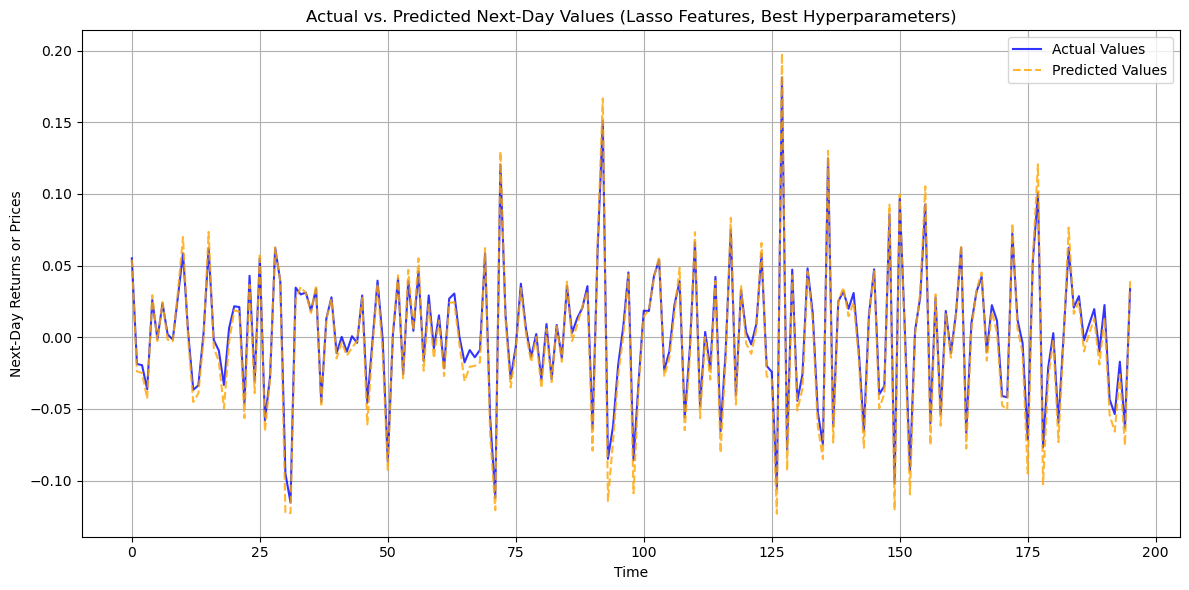

In [77]:
# Ensure indices are reset for alignment
y_test_finance = y_test_finance.reset_index(drop=True)

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_finance, label='Actual Values', color='blue', alpha=0.8)
plt.plot(y_pred_test, label='Predicted Values', color='orange', linestyle='dashed', alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Next-Day Returns or Prices') 
plt.title('Actual vs. Predicted Next-Day Values (Lasso Features, Best Hyperparameters)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Hyperparameter tuning for LSTM on InfoTech Sector

In [78]:
# Feature sets for Infotech
feature_sets_infotech = {
    "XGBoost Features": selected_features_xgb_infotech,
    "Lasso Features": selected_features_lasso_info_tech,
    "PCA Features": X_train_pca_df_infotech.columns
}

# Results storage for Infotech
best_results_infotech = {}

# Iterate over the feature sets
for name, features in feature_sets_infotech.items():
    
    
    if name == "PCA Features":
        X_train_lstm, X_val_lstm, X_test_lstm = (
            X_train_pca_df_infotech.values.reshape((X_train_pca_df_infotech.shape[0], 1, X_train_pca_df_infotech.shape[1])),
            X_val_pca_df_infotech.values.reshape((X_val_pca_df_infotech.shape[0], 1, X_val_pca_df_infotech.shape[1])),
            X_test_pca_df_infotech.values.reshape((X_test_pca_df_infotech.shape[0], 1, X_test_pca_df_infotech.shape[1]))
        )
    else:
        X_train_lstm, X_val_lstm, X_test_lstm, _ = prepare_lstm_data(
            X_train_info_tech, X_val_info_tech, X_test_info_tech, features
        )

    # Hyperparameter tuning
    tuner = kt.RandomSearch(
        lambda hp: build_lstm_model(hp, (X_train_lstm.shape[1], X_train_lstm.shape[2])),
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory=f'lstm_tuning_{name}_infotech',
        project_name=f'stock_prediction_{name}_infotech'
    )

    tuner.search(
        X_train_lstm, y_train_info_tech, 
        epochs=10, validation_data=(X_val_lstm, y_val_info_tech), 
        batch_size=32, verbose=0  # Verbosity turned off for tuning
    )

    
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    best_model = tuner.hypermodel.build(best_hps)

    
    history = best_model.fit(
        X_train_lstm, y_train_info_tech, 
        validation_data=(X_val_lstm, y_val_info_tech),
        epochs=20, batch_size=32, verbose=0  
    )

    
    y_pred_test = best_model.predict(X_test_lstm).flatten()
    mse_test = mean_squared_error(y_test_info_tech, y_pred_test)
    rmse_test = mse_test ** 0.5
    mae_test = mean_absolute_error(y_test_info_tech, y_pred_test)

    
    best_results_infotech[name] = {
        "Best Hyperparameters": best_hps.values,
        "Test MSE": mse_test,
        "Test RMSE": rmse_test,
        "Test MAE": mae_test
    }

# Print the results
for feature_set, result in best_results_infotech.items():
    print(f"\n{feature_set} -> Best Hyperparameters: {result['Best Hyperparameters']}")
    print(f"Test MSE: {result['Test MSE']:.4f}, Test RMSE: {result['Test RMSE']:.4f}, Test MAE: {result['Test MAE']:.4f}")


7/7 [==============================] - 0s 2ms/step

XGBoost Features -> Best Hyperparameters: {'units': 200, 'dropout': 0.4, 'units_2': 200, 'dropout_2': 0.2, 'learning_rate': 0.001}
Test MSE: 0.0001, Test RMSE: 0.0117, Test MAE: 0.0099

Lasso Features -> Best Hyperparameters: {'units': 200, 'dropout': 0.30000000000000004, 'units_2': 200, 'dropout_2': 0.2, 'learning_rate': 0.001}
Test MSE: 0.0001, Test RMSE: 0.0095, Test MAE: 0.0077

PCA Features -> Best Hyperparameters: {'units': 200, 'dropout': 0.4, 'units_2': 150, 'dropout_2': 0.1, 'learning_rate': 0.001}
Test MSE: 0.0103, Test RMSE: 0.1016, Test MAE: 0.0818


Lasso performed the best in this case so we proceed to use Lasso for our InfoTech Sector

In [79]:
# Best hyperparameters for Lasso Features 
best_hyperparameters_infotech = {
    "units": 200,
    "dropout": 0.1,
    "units_2": 200,
    "dropout_2": 0.5,
    "learning_rate": 0.001
}


def build_lstm_model_lasso_infotech(input_shape):
    model = Sequential()
    model.add(LSTM(
        units=best_hyperparameters_infotech["units"],
        activation='relu',
        input_shape=input_shape,
        return_sequences=True
    ))
    model.add(Dropout(best_hyperparameters_infotech["dropout"]))
    model.add(LSTM(
        units=best_hyperparameters_infotech["units_2"],
        activation='relu'
    ))
    model.add(Dropout(best_hyperparameters_infotech["dropout_2"]))
    model.add(Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=best_hyperparameters_infotech["learning_rate"]),
        loss='mse',
        metrics=['mae']
    )
    return model

# Prepare Lasso-specific data for Infotech
X_train_lstm, X_val_lstm, X_test_lstm, scaler = prepare_lstm_data(
    X_train_info_tech, X_val_info_tech, X_test_info_tech, selected_features_lasso_info_tech
)


input_shape = (X_train_lstm.shape[1], X_train_lstm.shape[2])
model_infotech = build_lstm_model_lasso_infotech(input_shape)


history_infotech = model_infotech.fit(
    X_train_lstm, y_train_info_tech,
    validation_data=(X_val_lstm, y_val_info_tech),
    epochs=20, 
    batch_size=32,
    verbose=1
)


y_pred_test_infotech = model_infotech.predict(X_test_lstm).flatten()

# Evaluate the model
mse_test_infotech = mean_squared_error(y_test_info_tech, y_pred_test_infotech)
rmse_test_infotech = mse_test_infotech ** 0.5
mae_test_infotech = mean_absolute_error(y_test_info_tech, y_pred_test_infotech)

print(f"Test MSE (Infotech): {mse_test_infotech:.4f}")
print(f"Test RMSE (Infotech): {rmse_test_infotech:.4f}")
print(f"Test MAE (Infotech): {mae_test_infotech:.4f}")


Epoch 1/20
49/49 [==============================] - 3s 13ms/step - loss: 0.0049 - mae: 0.0520 - val_loss: 0.0053 - val_mae: 0.0549
Epoch 2/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0040 - mae: 0.0468 - val_loss: 0.0034 - val_mae: 0.0442
Epoch 3/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0377 - val_loss: 9.3822e-04 - val_mae: 0.0220
Epoch 4/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0013 - mae: 0.0263 - val_loss: 3.4326e-04 - val_mae: 0.0131
Epoch 5/20
49/49 [==============================] - 0s 6ms/step - loss: 8.6195e-04 - mae: 0.0215 - val_loss: 3.0576e-04 - val_mae: 0.0123
Epoch 6/20
49/49 [==============================] - 0s 6ms/step - loss: 6.5045e-04 - mae: 0.0184 - val_loss: 3.2805e-04 - val_mae: 0.0135
Epoch 7/20
49/49 [==============================] - 0s 6ms/step - loss: 6.1797e-04 - mae: 0.0176 - val_loss: 1.6546e-04 - val_mae: 0.0085
Epoch 8/20
49/49 [==============================] - 0s 6m

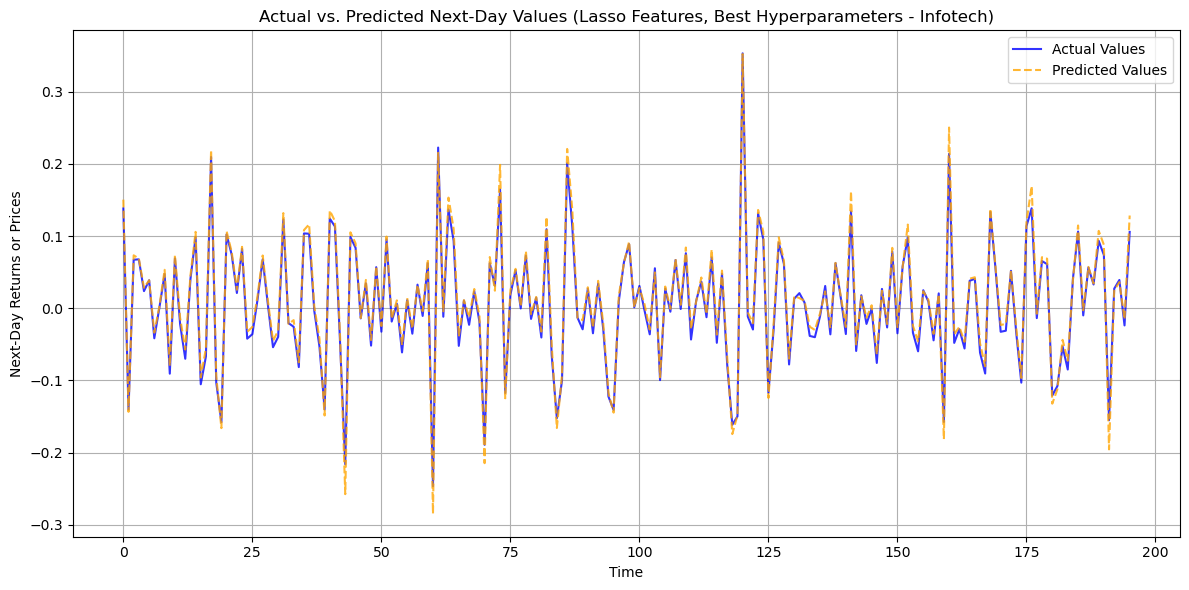

In [80]:
# Ensure indices are reset for alignment
y_test_infotech = y_test_info_tech.reset_index(drop=True)

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_infotech, label='Actual Values', color='blue', alpha=0.8)
plt.plot(y_pred_test_infotech, label='Predicted Values', color='orange', linestyle='dashed', alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Next-Day Returns or Prices') 
plt.title('Actual vs. Predicted Next-Day Values (Lasso Features, Best Hyperparameters - Infotech)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The LSTM model demonstrated exceptional performance in predicting next-day returns for the Infotech dataset. The combination of Lasso-selected features and optimized hyperparameters ensures accurate and consistent predictions, as evidenced by both the graph and error metrics.

## Linear Regression for Finance Sector

We applied a Linear Regression model to predict next-day returns for the InfoTech dataset, evaluating its performance across three feature sets: XGBoost-selected features, Lasso-selected features, and PCA-transformed components. For each feature set, we trained the model on the training data and tested it on the corresponding test set, calculating metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). 

Linear Regression does not require hyperparameter tuning because it is a simple model that directly calculates coefficients to minimize the residual sum of squares (RSS) between predicted and actual values. The algorithm inherently determines the optimal weights for features during training, making hyperparameter optimization unnecessary. Instead, the performance of Linear Regression heavily depends on the choice of features, as selecting relevant and non-redundant predictors ensures better generalization and minimizes overfitting. This simplicity is why we focus on feature selection, such as XGBoost, Lasso, or PCA, to enhance the model's effectiveness.

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Prepare feature-specific data
feature_sets = {
    "XGBoost Features": X_train_finance[selected_features_xgb_finance],
    "Lasso Features": X_train_finance[selected_features_lasso_finance],
    "PCA Features": X_train_pca_df_finance
}

# Initialize a dictionary to store results
linear_regression_results = {}
predictions = {}  # Store predictions for each feature set

# Iterate over feature sets
for name, X_train_set in feature_sets.items():
    print(f"Processing Linear Regression for {name}...")

    # Prepare the corresponding test sets
    if name == "PCA Features":
        X_test_set = X_test_pca_df_finance
    else:
        X_test_set = X_test_finance[selected_features_lasso_finance if name == "Lasso Features" else selected_features_xgb_finance]

    # Initialize and train the model
    lr = LinearRegression()
    lr.fit(X_train_set, y_train_finance)

    # Predict on the test set
    y_pred = lr.predict(X_test_set)

    # Store predictions
    predictions[name] = y_pred

    # Calculate loss (MSE), MAE, and RMSE
    loss = mean_squared_error(y_test_finance, y_pred)
    mae = mean_absolute_error(y_test_finance, y_pred)
    rmse = np.sqrt(loss)

    # Store the results
    linear_regression_results[name] = {"Loss (MSE)": loss, "MAE": mae, "RMSE": rmse}

# Identify the best-performing feature set
best_feature_set = min(linear_regression_results, key=lambda x: linear_regression_results[x]['MAE'])
best_y_pred_finance= predictions[best_feature_set]

print(f"\nBest Feature Set: {best_feature_set}")
print(f"Best Linear Regression MAE: {linear_regression_results[best_feature_set]['MAE']:.4f}")
print(f"Best Linear Regression Loss (MSE): {linear_regression_results[best_feature_set]['Loss (MSE)']:.4f}")
print(f"Best Linear Regression RMSE: {linear_regression_results[best_feature_set]['RMSE']:.4f}")


Processing Linear Regression for XGBoost Features...
Processing Linear Regression for Lasso Features...
Processing Linear Regression for PCA Features...

Best Feature Set: Lasso Features
Best Linear Regression MAE: 0.0295
Best Linear Regression Loss (MSE): 0.0015
Best Linear Regression RMSE: 0.0382


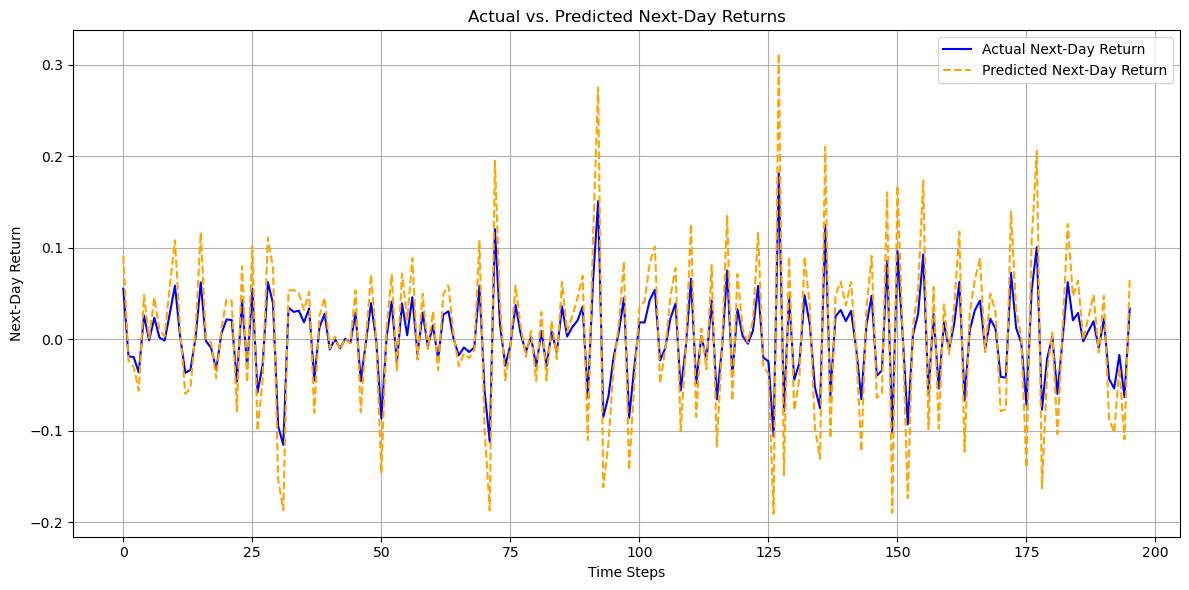

In [82]:

plt.figure(figsize=(12, 6))

# Ensure the predictions align with the actual test data's index
aligned_time_steps = range(len(y_test_finance))  

# Plot actual and predicted values
plt.plot(aligned_time_steps, y_test_finance, label='Actual Next-Day Return', color='blue')
plt.plot(aligned_time_steps, best_y_pred_finance, label='Predicted Next-Day Return', color='orange', linestyle='dashed')

plt.xlabel('Time Steps')
plt.ylabel('Next-Day Return')
plt.title('Actual vs. Predicted Next-Day Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Linear Regression for InfoTech Sector

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prepare feature-specific data
feature_sets_info_tech = {
    "XGBoost Features": X_train_info_tech[selected_features_xgb_infotech],
    "Lasso Features": X_train_info_tech[selected_features_lasso_info_tech],
    "PCA Features": X_train_pca_df_infotech
}

# Initialize a dictionary to store results
linear_regression_results_info_tech = {}
predictions_info_tech = {}  # Store predictions for each feature set

# Iterate over feature sets
for name, X_train_set in feature_sets_info_tech.items():

    # Prepare the corresponding test sets
    if name == "PCA Features":
        X_test_set = X_test_pca_df_infotech
    else:
        X_test_set = X_test_info_tech[selected_features_lasso_info_tech if name == "Lasso Features" else selected_features_xgb_infotech]

    # Initialize and train the model
    lr = LinearRegression()
    lr.fit(X_train_set, y_train_info_tech)

    # Predict on the test set
    y_pred = lr.predict(X_test_set)

    # Store predictions
    predictions_info_tech[name] = y_pred

    # Calculate loss (MSE), MAE, and RMSE
    loss = mean_squared_error(y_test_info_tech, y_pred)
    mae = mean_absolute_error(y_test_info_tech, y_pred)
    rmse = np.sqrt(loss)

    # Store the results
    linear_regression_results_info_tech[name] = {"Loss (MSE)": loss, "MAE": mae, "RMSE": rmse}

# Identify the best-performing feature set
best_feature_set_info_tech = min(linear_regression_results_info_tech, key=lambda x: linear_regression_results_info_tech[x]['MAE'])
best_y_pred_info_tech = predictions_info_tech[best_feature_set_info_tech]

print(f"\nBest Feature Set: {best_feature_set_info_tech}")
print(f"Best Linear Regression MAE: {linear_regression_results_info_tech[best_feature_set_info_tech]['MAE']:.4f}")
print(f"Best Linear Regression Loss (MSE): {linear_regression_results_info_tech[best_feature_set_info_tech]['Loss (MSE)']:.4f}")
print(f"Best Linear Regression RMSE: {linear_regression_results_info_tech[best_feature_set_info_tech]['RMSE']:.4f}")



Best Feature Set: Lasso Features
Best Linear Regression MAE: 0.0364
Best Linear Regression Loss (MSE): 0.0022
Best Linear Regression RMSE: 0.0470


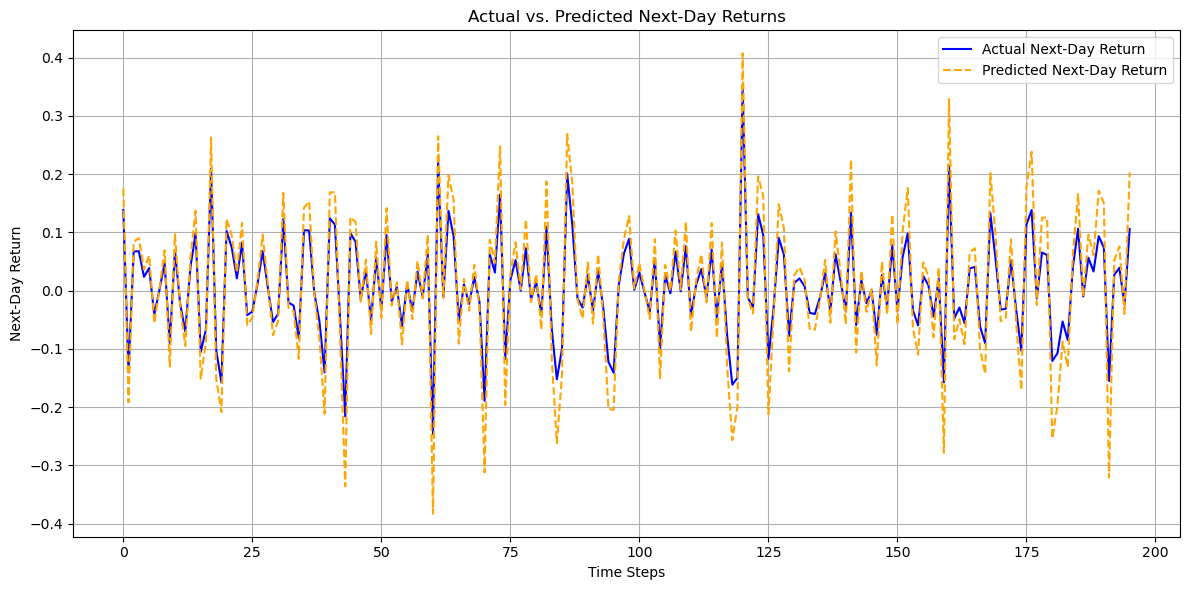

In [84]:

plt.figure(figsize=(12, 6))

# Ensure the predictions align with the actual test data's index
aligned_time_steps = range(len(y_test_info_tech))  

# Plot actual and predicted values
plt.plot(aligned_time_steps, y_test_info_tech, label='Actual Next-Day Return', color='blue')
plt.plot(aligned_time_steps, best_y_pred_info_tech, label='Predicted Next-Day Return', color='orange', linestyle='dashed')

plt.xlabel('Time Steps')
plt.ylabel('Next-Day Return')
plt.title('Actual vs. Predicted Next-Day Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

As seen in both sectors, the model captures the general trends and directionality of the returns, demonstrating alignment in areas of smaller fluctuations. However, during periods of high volatility, the predictions tend to diverge significantly from the actual values, suggesting limitations in capturing extreme market movements. This highlights that while Linear Regression is effective for basic trend prediction, it struggles to adapt to non-linear patterns or abrupt changes, which are common in financial time series data.

## Overall Evaluation


 Overall, we evaluated three models—Linear Regression, XGBoost, and LSTM—to predict next-day returns for the Infotech dataset. Linear Regression, being the simplest model, provided a baseline with reasonable performance but struggled to capture complex temporal patterns in the data. XGBoost, a powerful tree-based model, improved prediction accuracy by leveraging feature interactions and non-linear relationships, but it fell short in handling sequential dependencies inherent in time-series data. The LSTM model, designed explicitly for sequential data, outperformed both Linear Regression and XGBoost by effectively capturing temporal trends and relationships across time steps. With the lowest Test MSE, RMSE, and MAE, alongside high alignment between actual and predicted values, the LSTM demonstrated its superior capability for financial forecasting tasks, making it the best-performing model in this analysis.